In [1]:
import numpy as np
import csv
import pandas as pd

from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector, Bidirectional
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline


def reorder_csv(file_path)

def generate_csv(data, title, str_path):
    save_file = ""
    if(title == "actions"):
        save_file = str_path
    elif(title == "obs"):
        save_file = str_path
    
    np.savetxt(save_file, data, delimiter=",")
    all_filenames.append(save_file)
    
    with open(save_file,newline='') as f:
        r = csv.reader(f)
        row_data = [line for line in r]
        
    if(title == "actions"):
        with open(save_file,'w',newline='') as f:
            w = csv.writer(f)
            w.writerow(['act_arm_one', 'act_arm_two', 'act_arm_three', 'act_arm_four', 'act_arm_five', 'act_arm_six', 'act_arm_seven',
                       'act_finger_lt0', 'act_finger_rg0', 'act_finger_md0',
                       'act_finger_if0', 'act_finger_if1', 'act_finger_if2',
                       'act_finger_tb0', 'act_finger_tb1', 'act_finger_tb2'])
            
            w.writerows(row_data)
            return save_file
    elif(title == "obs"):
         with open(save_file,'w',newline='') as f:
            w = csv.writer(f)
            w.writerow(['arm_one', 'arm_two', 'arm_three', 'arm_four', 'arm_five', 'arm_six', 'arm_seven', 
                        'drink_x', 'drink_y', 'drink_z',
                        'hand_x', 'hand_y', 'hand_z', 
                        'finger_lt0', 'finger_rg0', 'finger_md0',
                        'finger_if0', 'finger_if1', 'finger_if2',
                        'finger_tb0', 'finger_tb1', 'finger_tb2'])
            
            w.writerows(row_data)
            return save_file
            
def merge_csv(obs_path, action_path, save_path):

    a = pd.read_csv(obs_path)
    b = pd.read_csv(action_path)
    result = pd.concat([a, b], axis=1)
    result.to_csv(save_path, index=False)


Using TensorFlow backend.


In [2]:
def readTrain(file_path):
    train = pd.read_csv(file_path)
    print(train)
    print(train.shape)
    return train

def augDataRow(train, timestep):
    zero_row = train.loc[0]
    final_row = train.loc[train.shape[0]-1]
    df = pd.DataFrame([zero_row],columns=['arm_one', 'arm_two', 'arm_three', 'arm_four', 'arm_five', 'arm_six', 'arm_seven', 
                                          'drink_x', 'drink_y', 'drink_z',
                                          'hand_x', 'hand_y', 'hand_z', 
                                          'finger_lt0', 'finger_rg0', 'finger_md0',
                                          'finger_if0', 'finger_if1', 'finger_if2',
                                          'finger_tb0', 'finger_tb1', 'finger_tb2',
                                          'act_arm_one', 'act_arm_two', 'act_arm_three', 'act_arm_four', 'act_arm_five', 'act_arm_six', 'act_arm_seven',
                                          'act_finger_lt0', 'act_finger_rg0', 'act_finger_md0',
                                          'act_finger_if0', 'act_finger_if1', 'act_finger_if2',
                                          'act_finger_tb0', 'act_finger_tb1', 'act_finger_tb2'])
                                          
    
    df_final = pd.DataFrame([final_row],columns=['arm_one', 'arm_two', 'arm_three', 'arm_four', 'arm_five', 'arm_six', 'arm_seven', 
                                                 'drink_x', 'drink_y', 'drink_z',
                                                 'hand_x', 'hand_y', 'hand_z', 
                                                 'finger_lt0', 'finger_rg0', 'finger_md0',
                                                 'finger_if0', 'finger_if1', 'finger_if2',
                                                 'finger_tb0', 'finger_tb1', 'finger_tb2',
                                                 'act_arm_one', 'act_arm_two', 'act_arm_three', 'act_arm_four', 'act_arm_five', 'act_arm_six', 'act_arm_seven',
                                                 'act_finger_lt0', 'act_finger_rg0', 'act_finger_md0',
                                                 'act_finger_if0', 'act_finger_if1', 'act_finger_if2',
                                                 'act_finger_tb0', 'act_finger_tb1', 'act_finger_tb2'])
    
    for i in range(timestep-1):
        train = pd.concat([df,train], ignore_index = True)
        
    for i in range(timestep-1):
        train = pd.concat([train,df_final], ignore_index = True)
        
    print(type(train))
    print(train.shape)   
    print(train)
    return train

hand_x_max_arr = []
hand_x_min_arr = []
hand_y_max_arr = []
hand_y_min_arr = []
hand_z_max_arr = []
hand_z_min_arr = []

def hand_pos(train):
    hand_x_max = -1000.0
    hand_x_min = 1000.0
    for i in range(train['hand_x'].shape[0]):
        if(train['hand_x'][i] > hand_x_max):
            hand_x_max = train['hand_x'][i]
    for i in range(train['hand_x'].shape[0]):
        if(train['hand_x'][i] < hand_x_min):
            hand_x_min = train['hand_x'][i]
    
    print("hand_x max is : " + str(hand_x_max))
    hand_x_max_arr.append(hand_x_max)
    print("hand_x min is : " + str(hand_x_min))
    hand_x_min_arr.append(hand_x_min)
    
    hand_y_max = -1000.0
    hand_y_min = 1000.0
    for i in range(train['hand_y'].shape[0]):
#         print(train['hand_y'][i])
        if(train['hand_y'][i] > hand_y_max):
            hand_y_max = train['hand_y'][i]
    for i in range(train['hand_y'].shape[0]):
        if(train['hand_y'][i] < hand_y_min):
            hand_y_min = train['hand_y'][i]
    
    print("hand_y max is : " + str(hand_y_max))
    hand_y_max_arr.append(hand_y_max)
    print("hand_y min is : " + str(hand_y_min))
    hand_y_min_arr.append(hand_y_min)
    
     
    hand_z_max = -1000.0
    hand_z_min = 1000.0
    for i in range(train['hand_z'].shape[0]):
#         print(train['hand_z'][i])
        if(train['hand_z'][i] > hand_z_max):
            hand_z_max = train['hand_z'][i]
    for i in range(train['hand_z'].shape[0]):
        if(train['hand_z'][i] < hand_z_min):
            hand_z_min = train['hand_z'][i]
    
    print("hand_z max is : " + str(hand_z_max))
    hand_z_max_arr.append(hand_z_max)
    print("hand_z min is : " + str(hand_z_min))
    hand_z_min_arr.append(hand_z_min)

###for many dataset
def many_normalize(train):
    max_x = 0.95
    min_x = 0.65
    max_z = 0.3
    min_z = 0.0
    
    train = train.drop(['drink_y'], axis=1)
    train['drink_x'] = (train['drink_x'] - min_x)/(max_x - min_x)
#    train['drink_y'] = (train['drink_y'] - train['drink_y'].min())/(train['drink_y'].max() - train['drink_y'].min())
    train['drink_z'] = (train['drink_z'] - min_z)/(max_z - min_z)
    
    hand_x_max = -1000.0
    hand_x_min = 1000.0
    hand_y_max = -1000.0
    hand_y_min = 1000.0
    hand_z_max = -1000.0
    hand_z_min = 1000.0
    
    for i in range(len(hand_x_max_arr)):
        if(hand_x_max_arr[i] > hand_x_max):
            hand_x_max = hand_x_max_arr[i]
    for i in range(len(hand_x_min_arr)):
        if(hand_x_min_arr[i] < hand_x_min):
            hand_x_min = hand_x_min_arr[i]
            
    
    for i in range(len(hand_y_max_arr)):
        if(hand_y_max_arr[i] > hand_y_max):
            hand_y_max = hand_y_max_arr[i]
    for i in range(len(hand_y_min_arr)):
        if(hand_y_min_arr[i] < hand_y_min):
            hand_y_min = hand_y_min_arr[i]
            
    for i in range(len(hand_z_max_arr)):
        if(hand_z_max_arr[i] > hand_z_max):
            hand_z_max = hand_z_max_arr[i]
    for i in range(len(hand_z_min_arr)):
        if(hand_z_min_arr[i] < hand_z_min):
            hand_z_min = hand_z_min_arr[i]
            
    print("hand_x_max_arr is : " )
    print(hand_x_max_arr)
    print(hand_x_max)
    print("hand_x_min_arr is : " )
    print(hand_x_min_arr)
    print(hand_x_min)
    print("hand_y_max_arr is : " )
    print(hand_y_max_arr)
    print(hand_y_max)
    print("hand_y_min_arr is : " )
    print(hand_y_min_arr)
    print(hand_y_min)
    print("hand_z_max_arr is : " )
    print(hand_z_max_arr)
    print(hand_z_max)
    print("hand_z_min_arr is : " )
    print(hand_z_min_arr)
    print(hand_z_min)

    train['hand_x'] = (train['hand_x'] - hand_x_min)/(hand_x_max - hand_x_min)
    train['hand_y'] = (train['hand_y'] - hand_y_min)/(hand_y_max - hand_y_min)
    train['hand_z'] = (train['hand_z'] - hand_z_min)/(hand_z_max - hand_z_min)
     
    return train

"""
def DF_Col_Max_Min(train, column_name):
    
    max_value = -1000.0
    min_value = 1000.0
    
    for i in range(train[column_name].shape[0]):
        if(train[column_name][i] > max_value):
            max_value = train[column_name][i]
            
    for i in range(train[column_name].shape[0]):
        if(train[column_name][i] < min_value):
            min_value = train[column_name][i]
    
    return max_value, min_value
"""
###for one dataset
def normalize(train):
    #in dataset 0->8 : max_x = 0.9 min_x = 0.7 / max_y = min_y=0.82 / max_z = 0.25 min_z = 0.05 

    max_x = 0.95
    min_x = 0.65
    max_z = 0.3
    min_z = 0.0
    
    train = train.drop(['drink_y'], axis=1)
    train['drink_x'] = (train['drink_x'] - min_x)/(max_x - min_x)
#    train['drink_y'] = (train['drink_y'] - train['drink_y'].min())/(train['drink_y'].max() - train['drink_y'].min())
    train['drink_z'] = (train['drink_z'] - min_z)/(max_z - min_z)
    
    hand_x_max = -1000.0
    hand_x_min = 1000.0
    for i in range(train['hand_x'].shape[0]):
#         print(train['hand_x'][i])
        if(train['hand_x'][i] > hand_x_max):
            hand_x_max = train['hand_x'][i]
    for i in range(train['hand_x'].shape[0]):
        if(train['hand_x'][i] < hand_x_min):
            hand_x_min = train['hand_x'][i]
    
    print("hand_x max is : " + str(hand_x_max))
    print("hand_x min is : " + str(hand_x_min))
    
    hand_y_max = -1000.0
    hand_y_min = 1000.0
    for i in range(train['hand_y'].shape[0]):
#         print(train['hand_y'][i])
        if(train['hand_y'][i] > hand_y_max):
            hand_y_max = train['hand_y'][i]
    for i in range(train['hand_y'].shape[0]):
        if(train['hand_y'][i] < hand_y_min):
            hand_y_min = train['hand_y'][i]
    
    print("hand_y max is : " + str(hand_y_max))
    print("hand_y min is : " + str(hand_y_min))
    
    hand_z_max = -1000.0
    hand_z_min = 1000.0
    for i in range(train['hand_z'].shape[0]):
#         print(train['hand_z'][i])
        if(train['hand_z'][i] > hand_z_max):
            hand_z_max = train['hand_z'][i]
    for i in range(train['hand_z'].shape[0]):
        if(train['hand_z'][i] < hand_z_min):
            hand_z_min = train['hand_z'][i]
    
    print("hand_z max is : " + str(hand_z_max))
    print("hand_z min is : " + str(hand_z_min))

#     train['hand_x'] = (train['hand_x'] - train['hand_x'].min())/(train['hand_x'].max() - train['hand_x'].min())
#     train['hand_y'] = (train['hand_y'] - train['hand_y'].min())/(train['hand_y'].max() - train['hand_y'].min())
#     train['hand_z'] = (train['hand_z'] - train['hand_z'].min())/(train['hand_z'].max() - train['hand_z'].min())
      
    train['hand_x'] = (train['hand_x'] - hand_x_min)/(hand_x_max - hand_x_min)
    train['hand_y'] = (train['hand_y'] - hand_y_min)/(hand_y_max - hand_y_min)
    train['hand_z'] = (train['hand_z'] - hand_z_min)/(hand_z_max - hand_z_min)
     

    return train

def buildTrain_v2(train, timesteps):
    X_train, Y_train = [], []
    print(type(train))
    #original is 12 
    #plus 9 hand andgle
    train_split = np.split(train, [21], axis=1)
    X_train = train_split[0]
    Y_train = train_split[1]
    X_train_new = []
    Y_train_new = []
    
    print(Y_train)
    print(type(Y_train))
    print(Y_train.shape)
    
    timesteps = timesteps-1
    for i in range(train.shape[0] - timesteps):
#         print("now i is : " + str(i))
#         print(np.array(X_train.loc[i:i+timesteps]))
        X_train_new.append(np.array(X_train.loc[i:i+timesteps]))
    
    Y_train_new = np.array(Y_train.loc[0+timesteps:Y_train.shape[0]-1])   
              
    return np.array(X_train_new), Y_train_new


def shuffle(X,Y):
    np.random.seed(10)
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]


def splitData(X,Y,rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

def buildManyToOneModel(X_train):
    model = Sequential()
    ##many to many
    #model.add(LSTM(units = 64, return_sequences = True, input_shape = (1, X_train.shape[-1])))
    ##many to many
    model.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 32))
    model.add(Dropout(0.2))
    model.add(Dense(units = 16))
    model.compile(loss="mean_squared_error", optimizer="rmsprop")
    #rmsprop
    model.summary()

    return model

def buildManyToOneModel_expand_depth(X_train):
    model = Sequential()
    model.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 64, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 32))
    model.add(Dropout(0.2))
    model.add(Dense(units = 16))
    model.compile(loss="mean_squared_error", optimizer="rmsprop")
    #rmsprop
    model.summary()

    return model

##success single postion model
def buildManyToOneModel_expand_depth_rcdropout(X_train):
    model = Sequential()
    model.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2]), recurrent_dropout = 0.2))
    model.add(LSTM(units = 64, return_sequences = True, recurrent_dropout = 0.2))
    model.add(LSTM(units = 32, recurrent_dropout = 0.2))
    model.add(Dense(units = 16))
    model.compile(loss="mean_squared_error", optimizer="rmsprop")
    #rmsprop
    model.summary()

    return model


#success single postion model & recurrent initialzer
def buildManyToOneModel_expand_depth_rcdropout_doctor(X_train):
    model = Sequential()
    model.add(LSTM(units = 128, return_sequences = True, recurrent_initializer="orthogonal", input_shape = (X_train.shape[1], X_train.shape[2]), recurrent_dropout = 0.2))
    model.add(LSTM(units = 64, return_sequences = True, recurrent_initializer="orthogonal", recurrent_dropout = 0.2))
    model.add(LSTM(units = 32, recurrent_initializer="orthogonal", recurrent_dropout = 0.2))
    model.add(Dense(units = 16))
    model.compile(loss="mean_squared_error", optimizer="rmsprop")
    #rmsprop
    model.summary()

    return model


##v2 represent add bidirectional & recurrent_ininlizer######
def buildManyToOneModel_expand_depth_rcdropout_V2(X_train):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = 128, return_sequences = True, recurrent_initializer="orthogonal", input_shape = (X_train.shape[1], X_train.shape[2]), recurrent_dropout = 0.2)))
    model.add(Bidirectional(LSTM(units = 64, return_sequences = True, recurrent_initializer="orthogonal", recurrent_dropout = 0.2)))
    model.add(Bidirectional(LSTM(units = 32, recurrent_initializer="orthogonal", recurrent_dropout = 0.2)))
    model.add(Dense(units = 16))
    model.compile(loss="mean_squared_error", optimizer="rmsprop")
    #rmsprop
#     model.summary()

    return model


##represent add bidirectional & orthogonal ######
def buildManyToOneModel_expand_depth_nrcdropout_V2(X_train):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = 128, return_sequences = True, recurrent_initializer="orthogonal", input_shape = (X_train.shape[1], X_train.shape[2]))))
    model.add(Bidirectional(LSTM(units = 64, return_sequences = True, recurrent_initializer="orthogonal")))
    model.add(Bidirectional(LSTM(units = 32, recurrent_initializer="orthogonal")))
    model.add(Dense(units = 16))
    model.compile(loss="mean_squared_error", optimizer="rmsprop")
    #rmsprop
#     model.summary()

    return model



def buildManyToOneModel_expand_depth_V2(X_train):
    model = Sequential()
    model.add(LSTM(units = 512, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 256, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 64))
    model.add(Dropout(0.2))
    model.add(Dense(units = 16))
    model.compile(loss="mean_squared_error", optimizer="rmsprop")
    #rmsprop
#     model.summary()

    return model



def buildManyToOneModel_expand_width(X_train):
    model = Sequential()
    ##many to many
    #model.add(LSTM(units = 64, return_sequences = True, input_shape = (1, X_train.shape[-1])))
    ##many to many
    model.add(LSTM(units = 1024, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 256))
    model.add(Dropout(0.2))
    model.add(Dense(units = 16))
    model.compile(loss="mean_squared_error", optimizer="rmsprop")
    #rmsprop
    model.summary()

    return model

In [3]:
# # ####################single training single dataset####################################
# if __name__ == '__main__':
    
    
#     all_filenames = []
#     trag_pos = 5
# #     timesteps = 5
#     experiment_index = 0
    
#     while(experiment_index < 16):
#         if(experiment_index == 0):
#             timesteps = 5
#         elif(experiment_index == 1):
#             timesteps = 10
#         elif(experiment_index == 2):
#             timesteps = 20
#         elif(experiment_index == 3):
#             timesteps = 30
#         elif(experiment_index == 4):
#             timesteps = 40
#         elif(experiment_index == 5):
#             timesteps = 50
#         elif(experiment_index == 6):
#             timesteps = 60
#         elif(experiment_index == 7):
#             timesteps = 70
#         elif(experiment_index == 8):
#             timesteps = 80
#         elif(experiment_index == 9):
#             timesteps = 90
#         elif(experiment_index == 10):
#             timesteps = 100
#         elif(experiment_index == 11):
#             timesteps = 110
#         elif(experiment_index == 12):
#             timesteps = 120
#         elif(experiment_index == 13):
#             timesteps = 130
#         elif(experiment_index == 14):
#             timesteps = 140
#         elif(experiment_index == 15):
#             timesteps = 150
            
#         experiment_index = experiment_index + 1
        
        
#         filename = "datasets_full_trag/npz/Lstm-syn-dataset-fulltrag-addcoke/Lstm5_position.npz"
#         data = np.load(filename)
#         actions_val = None
#         obs_val = None

#         for key, value in data.items():
#             if(key == "actions"):
#                 actions_val = value
#             elif(key == "obs"):
#                 obs_val = value

#         action_path = generate_csv(actions_val, "actions", "datasets_full_trag/actions/5_actions.csv")
#         obs_path = generate_csv(obs_val, "obs", "datasets_full_trag/obs/5_obs.csv")
#         print(action_path)
#         print(obs_path)
#         merge_csv(obs_path, action_path, "datasets_full_trag/merge/5_dataset.csv")
#         train = readTrain("datasets_full_trag/merge/5_dataset.csv")
        

#         #augment data
#         aug_train = augDataRow(train, timesteps)
#         print("~~~~~~~~~~~~~~~~~~augmented finish~~~~~~~~~~~~~~~~~~~~~~~")

#         # Normalization
#         train_norm = normalize(aug_train)
#         print(train_norm)
#         print("~~~~~~~~~~~~~~~~~~normalize finish~~~~~~~~~~~~~~~~~~~~~~~")

#         X_train, Y_train = buildTrain_v2(train_norm, timesteps)


#         print(X_train.shape)
#         print(Y_train.shape)
#         ### shuffle the data, and random seed is 10
# #         X_train, Y_train = shuffle(X_train, Y_train)

#     # # # #     # split training data and validation data
#     # # # #     X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.2)


# #         model = buildManyToOneModel(X_train)
# #         model = buildManyToOneModel_expand_width(X_train)
#         model = buildManyToOneModel_expand_depth_dropout(X_train)
    
# #         model.fit(X_train, Y_train, epochs=500, batch_size=64)
#         callback = EarlyStopping(monitor="loss", patience=40, verbose=1, mode="auto")
#         history = model.fit(X_train, Y_train, epochs=500, batch_size=64)
#         model.summary()
# #         history = model.fit(X_train, Y_train, epochs=500, batch_size=64)

    
#         plt.plot(history.history['loss'])
# #         plt.plot(history.history['val_loss'])
#         plt.title('model loss')
#         plt.ylabel('loss')
#         plt.xlabel('epoch')
# #         plt.legend(['train', 'test'], loc='upper left')
#         plt.legend(['train'], loc='upper left')

# #         save_lossPic_path = "model_expand_depth/full_trag/512_256_64_ver/batch_size_128/Loss/" + str(trag_pos) + "_LstmFullTrag_" + str(timesteps) + ".png"
# #         save_lossPic_path = "model_expand_width/full_trag/1024_256_ver/batch_size_64/Loss/" + str(trag_pos) + "_LstmFullTrag_" + str(timesteps) + ".png"
# #         save_lossPic_path = "model/full_trag/batch_size_64/Loss/" + str(trag_pos) + "_LstmFullTrag_" + str(timesteps) + ".png"
#         save_lossPic_path = "model_expand_depth/full_trag/single_position/dropout_test/128_64_32_ver/batch_size_64/Loss/" + str(trag_pos) + "_LstmFullTrag_" + str(timesteps) + ".png"  
#         plt.savefig(save_lossPic_path)
        
#         plt.show()

# #         save_path = "model_expand_depth/full_trag/512_256_64_ver/batch_size_128/" + str(trag_pos) + "_LstmFullTrag_" + str(timesteps) + ".h5"
# #         save_path = "model_expand_width/full_trag/1024_256_ver/batch_size_64/" + str(trag_pos) + "_LstmFullTrag_" + str(timesteps) + ".h5"
# #         save_path = "model/full_trag//batch_size_64/" + str(trag_pos) + "_LstmFullTrag_" + str(timesteps) + ".h5"
#         save_path = "model_expand_depth/full_trag/single_position/dropout_test/128_64_32_ver/batch_size_64/" + str(trag_pos) + "_LstmFullTrag_" + str(timesteps) + ".h5"  

#         model.save(save_path)  # creates a HDF5 file

    
#         del model
    
#     print("training done")



In [4]:
    #         callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    # # # model.fit(X_train, Y_train, epochs=200, batch_size=32, callbacks=[callback])
    # # # model.fit(X_train, Y_train, epochs=200, batch_size=16, validation_data=(X_val, Y_val), callbacks=[callback])


      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

[205 rows x 38 columns]
<class 'pandas.core.frame.DataFrame'>
(203, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.743188  0.498898   0.497298  2.086508e-02  0.506050  0.502049   
6    0.738896  0.498234   0.498029  4.043882e-02  0.507110  0.501205   
7    0.731550  0.496087   0.499214  7.228328e-02  0.511075  0.497778   
8    0.723588  0.492373   0.499265  1.041272e-01  0.513335  0.497890   
9    0.715626  0.488272   0.501204  1.359711e-01  0.510645  0.498476   
10   0.707664  0.483874   0.502317  1.678153e-01  0.504823  0.498421   
11   0.699701  0.481272   0.502112  1.996598e-01  0.497211  0.50

[0.7731470312757966, 0.7810518983925026, 0.7704245915707718, 0.7792901679254952, 0.7436435363136658, 0.7874838585840966]
0.7436435363136658
hand_z_max_arr is : 
[0.4178323147900985, 0.3348836197284272, 0.4256143977285175, 0.4099229762423224, 0.5364807407684336, 0.4491884082347085]
0.5364807407684336
hand_z_min_arr is : 
[0.05963962946003624, 0.04366723176483128, 0.06687830778544702, 0.05698730421795072, 0.03751754497237245, 0.046540713599843415]
0.03751754497237245
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
hand_x_max_arr is : 
[0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402]
0.9548262497780282
hand_x_min_arr is : 
[0.6878815783593673, 0.7064161667824996, 0.6717803631085324, 0.7421045083853685, 0.5859430597247628, 0.7182828095117335]
0.5859430597247628
hand_y_max_arr is : 
[1.072390007877012, 1.072392115489022, 1.0723921154923597, 1.0723921155088898, 1.0723921154893272, 1.0723921154924043]
1.0723921155088898
hand_y_min_a

[194 rows x 16 columns]
<class 'pandas.core.frame.DataFrame'>
(194, 16)
(1155, 5, 21)
(1155, 16)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/500
1155/1155 [==============================] - 5s 5ms/step - loss: 0.0296
Epoch 2/500
1155/1155 [==============================] - 1s 862us/step - loss: 0.0057
Epoch 3/500
1155/1155 [==============================] - 1s 854us/step - loss: 0.0045
Epoch 4/500
1155/1155 [==============================] - 1s 857us/step - loss: 0.0038
Epoch 5/500
1155/1155 [==============================] - 1s 860us/step - loss: 0.0034
Epoch 6/500
1155/1155 [==============================] - 1s 865us/step - loss: 0.0031
Epoch 7/500
1155/1155 [==============================] - 1s 869us/step - loss: 0.0028
Epoch 8/500
1155/1155 [==============================] - 1s 895us/step - loss: 0.0023
Epoch 9/500
1155/1155 [==============================] - 1s 852us/step - loss: 0.0024
Epoch 10/500
1155/1155 [=======

1155/1155 [==============================] - 1s 856us/step - loss: 3.2194e-04
Epoch 75/500
1155/1155 [==============================] - 1s 853us/step - loss: 3.4251e-04
Epoch 76/500
1155/1155 [==============================] - 1s 851us/step - loss: 3.4558e-04
Epoch 77/500
1155/1155 [==============================] - 1s 845us/step - loss: 3.2946e-04
Epoch 78/500
1155/1155 [==============================] - 1s 856us/step - loss: 3.6577e-04
Epoch 79/500
1155/1155 [==============================] - 1s 858us/step - loss: 3.0325e-04
Epoch 80/500
1155/1155 [==============================] - 1s 856us/step - loss: 3.4791e-04
Epoch 81/500
1155/1155 [==============================] - 1s 866us/step - loss: 3.1441e-04
Epoch 82/500
1155/1155 [==============================] - 1s 855us/step - loss: 3.0526e-04
Epoch 83/500
1155/1155 [==============================] - 1s 858us/step - loss: 3.4044e-04
Epoch 84/500
1155/1155 [==============================] - 1s 857us/step - loss: 2.9848e-04
Epoch 85/500

1155/1155 [==============================] - 1s 861us/step - loss: 1.6444e-04
Epoch 164/500
1155/1155 [==============================] - 1s 853us/step - loss: 1.7654e-04
Epoch 165/500
1155/1155 [==============================] - 1s 863us/step - loss: 1.6246e-04
Epoch 166/500
1155/1155 [==============================] - 1s 868us/step - loss: 1.5744e-04
Epoch 167/500
1155/1155 [==============================] - 1s 923us/step - loss: 1.5668e-04
Epoch 168/500
1155/1155 [==============================] - 1s 869us/step - loss: 1.5896e-04
Epoch 169/500
1155/1155 [==============================] - 1s 872us/step - loss: 1.6808e-04
Epoch 170/500
1155/1155 [==============================] - 1s 855us/step - loss: 1.6582e-04
Epoch 171/500
1155/1155 [==============================] - 1s 857us/step - loss: 1.4628e-04
Epoch 172/500
1155/1155 [==============================] - 1s 851us/step - loss: 1.5656e-04
Epoch 173/500
1155/1155 [==============================] - 1s 845us/step - loss: 1.4737e-04
Ep

1155/1155 [==============================] - 1s 882us/step - loss: 1.1117e-04
Epoch 252/500
1155/1155 [==============================] - 1s 879us/step - loss: 1.0793e-04
Epoch 253/500
1155/1155 [==============================] - 1s 876us/step - loss: 1.1019e-04
Epoch 254/500
1155/1155 [==============================] - 1s 863us/step - loss: 1.0850e-04
Epoch 255/500
1155/1155 [==============================] - 1s 873us/step - loss: 9.7567e-05
Epoch 256/500
1155/1155 [==============================] - 1s 860us/step - loss: 1.1508e-04
Epoch 257/500
1155/1155 [==============================] - 1s 882us/step - loss: 1.1516e-04
Epoch 258/500
1155/1155 [==============================] - 1s 871us/step - loss: 9.5688e-05
Epoch 259/500
1155/1155 [==============================] - 1s 908us/step - loss: 1.1919e-04
Epoch 260/500
1155/1155 [==============================] - 1s 897us/step - loss: 9.9140e-05
Epoch 261/500
1155/1155 [==============================] - 1s 874us/step - loss: 1.0182e-04
Ep

1155/1155 [==============================] - 1s 867us/step - loss: 1.0035e-04
Epoch 341/500
1155/1155 [==============================] - 1s 860us/step - loss: 8.2218e-05
Epoch 342/500
1155/1155 [==============================] - 1s 872us/step - loss: 8.4615e-05
Epoch 343/500
1155/1155 [==============================] - 1s 865us/step - loss: 8.7384e-05
Epoch 344/500
1155/1155 [==============================] - 1s 863us/step - loss: 8.1342e-05
Epoch 345/500
1155/1155 [==============================] - 1s 866us/step - loss: 8.7326e-05
Epoch 346/500
1155/1155 [==============================] - 1s 876us/step - loss: 9.6338e-05
Epoch 347/500
1155/1155 [==============================] - 1s 873us/step - loss: 8.0129e-05
Epoch 348/500
1155/1155 [==============================] - 1s 864us/step - loss: 8.0095e-05
Epoch 349/500
1155/1155 [==============================] - 1s 857us/step - loss: 8.7424e-05
Epoch 350/500
1155/1155 [==============================] - 1s 877us/step - loss: 8.6242e-05
Ep

1155/1155 [==============================] - 1s 867us/step - loss: 7.8824e-05
Epoch 430/500
1155/1155 [==============================] - 1s 881us/step - loss: 7.1005e-05
Epoch 431/500
1155/1155 [==============================] - 1s 863us/step - loss: 8.1214e-05
Epoch 432/500
1155/1155 [==============================] - 1s 865us/step - loss: 7.3356e-05
Epoch 433/500
1155/1155 [==============================] - 1s 868us/step - loss: 7.8888e-05
Epoch 434/500
1155/1155 [==============================] - 1s 906us/step - loss: 7.3678e-05
Epoch 435/500
1155/1155 [==============================] - 1s 870us/step - loss: 7.2308e-05
Epoch 436/500
1155/1155 [==============================] - 1s 879us/step - loss: 7.7006e-05
Epoch 437/500
1155/1155 [==============================] - 1s 877us/step - loss: 7.4940e-05
Epoch 438/500
1155/1155 [==============================] - 1s 858us/step - loss: 8.4462e-05
Epoch 439/500
1155/1155 [==============================] - 1s 860us/step - loss: 7.8313e-05
Ep

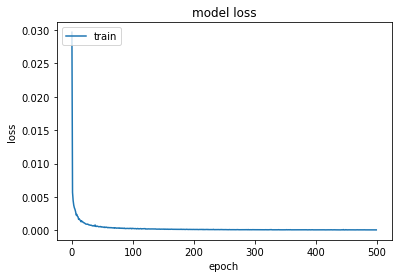

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

[215 rows x 38 columns]
<class 'pandas.core.frame.DataFrame'>
(213, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.743188  0.498898   0.497298  2.086508e-02  0.506050  0.502049   
11   0.738896  0.498234   0.498029  4.043882e-02  0.507110  0.50

<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.743548     0.493127       0.494005      0.031840      0.505729   
1       0.743548     0.493127       0.494005      0.031840      0.505729   
2       0.743548     0.493127       0.494005      0.031840      0.505729   
3       0.743548     0.493127       0.494005      0.031840      0.505729   
4       0.743548     0.493127       0.494005      0.031840      0.505729   
5       0.743548     0.493127       0.494005      0.031840      0.505729   
6       0.743548     0.493127       0.494005      0.031840      0.505729   
7       0.743548     0.493127       0.494005      0.031840      0.505729   
8       0.743548     0.493127       0.494005      0.031840      0.505729   
9       0.743548     0.493127       0.494005      0.031840      0.505729   
10      0.735586     0.487269       0.496417      0.063683      0.509953   
11      0.727624     0.484326       0.497985      

Epoch 1/500
1185/1185 [==============================] - 5s 4ms/step - loss: 0.0275
Epoch 2/500
1185/1185 [==============================] - 2s 2ms/step - loss: 0.0059
Epoch 3/500
1185/1185 [==============================] - 2s 2ms/step - loss: 0.0043
Epoch 4/500
1185/1185 [==============================] - 2s 2ms/step - loss: 0.0034
Epoch 5/500
1185/1185 [==============================] - 2s 2ms/step - loss: 0.0033
Epoch 6/500
1185/1185 [==============================] - 2s 2ms/step - loss: 0.0029
Epoch 7/500
1185/1185 [==============================] - 2s 2ms/step - loss: 0.0026
Epoch 8/500
1185/1185 [==============================] - 2s 2ms/step - loss: 0.0022
Epoch 9/500
1185/1185 [==============================] - 2s 1ms/step - loss: 0.0023
Epoch 10/500
1185/1185 [==============================] - 2s 1ms/step - loss: 0.0019
Epoch 11/500
1185/1185 [==============================] - 2s 1ms/step - loss: 0.0019A: 1s 
Epoch 12/500
1185/1185 [==============================] - 2s 2ms/ste

1185/1185 [==============================] - 2s 2ms/step - loss: 2.1749e-04
Epoch 94/500
1185/1185 [==============================] - 2s 2ms/step - loss: 2.3864e-04
Epoch 95/500
1185/1185 [==============================] - 2s 2ms/step - loss: 2.5870e-04
Epoch 96/500
1185/1185 [==============================] - 2s 2ms/step - loss: 2.4183e-04
Epoch 97/500
1185/1185 [==============================] - 2s 2ms/step - loss: 2.4065e-04
Epoch 98/500
1185/1185 [==============================] - 2s 2ms/step - loss: 2.1542e-04
Epoch 99/500
1185/1185 [==============================] - 2s 1ms/step - loss: 2.4287e-04
Epoch 100/500
1185/1185 [==============================] - 2s 2ms/step - loss: 2.3709e-04
Epoch 101/500
1185/1185 [==============================] - 2s 2ms/step - loss: 2.3149e-04
Epoch 102/500
1185/1185 [==============================] - 2s 2ms/step - loss: 2.1012e-04
Epoch 103/500
1185/1185 [==============================] - 2s 2ms/step - loss: 2.1283e-04
Epoch 104/500
1185/1185 [=====

1185/1185 [==============================] - 2s 2ms/step - loss: 1.3633e-04
Epoch 184/500
1185/1185 [==============================] - 2s 1ms/step - loss: 1.2465e-04
Epoch 185/500
1185/1185 [==============================] - 2s 1ms/step - loss: 1.4472e-04
Epoch 186/500
1185/1185 [==============================] - 2s 2ms/step - loss: 1.1708e-04
Epoch 187/500
1185/1185 [==============================] - 2s 2ms/step - loss: 1.3892e-04
Epoch 188/500
1185/1185 [==============================] - 2s 2ms/step - loss: 1.3037e-04
Epoch 189/500
1185/1185 [==============================] - 2s 2ms/step - loss: 1.3594e-04
Epoch 190/500
1185/1185 [==============================] - 2s 2ms/step - loss: 1.2366e-04
Epoch 191/500
1185/1185 [==============================] - 2s 1ms/step - loss: 1.1568e-04
Epoch 192/500
1185/1185 [==============================] - 2s 2ms/step - loss: 1.2572e-04
Epoch 193/500
1185/1185 [==============================] - 2s 1ms/step - loss: 1.1981e-04
Epoch 194/500
1185/1185 

1185/1185 [==============================] - 2s 2ms/step - loss: 9.6824e-05
Epoch 274/500
1185/1185 [==============================] - 2s 2ms/step - loss: 8.8809e-05
Epoch 275/500
1185/1185 [==============================] - 2s 2ms/step - loss: 9.3238e-05
Epoch 276/500
1185/1185 [==============================] - 2s 1ms/step - loss: 8.9933e-05
Epoch 277/500
1185/1185 [==============================] - 2s 1ms/step - loss: 9.0051e-05
Epoch 278/500
1185/1185 [==============================] - 2s 2ms/step - loss: 9.8314e-05
Epoch 279/500
1185/1185 [==============================] - 2s 2ms/step - loss: 8.9785e-05
Epoch 280/500
1185/1185 [==============================] - 2s 2ms/step - loss: 1.0524e-04
Epoch 281/500
1185/1185 [==============================] - 2s 2ms/step - loss: 8.8434e-05
Epoch 282/500
1185/1185 [==============================] - 2s 2ms/step - loss: 9.4436e-05
Epoch 283/500
1185/1185 [==============================] - 2s 2ms/step - loss: 8.9407e-05
Epoch 284/500
1185/1185 

1185/1185 [==============================] - 2s 2ms/step - loss: 8.2198e-05
Epoch 364/500
1185/1185 [==============================] - 2s 1ms/step - loss: 7.0894e-05
Epoch 365/500
1185/1185 [==============================] - 2s 2ms/step - loss: 8.2521e-05
Epoch 366/500
1185/1185 [==============================] - 2s 2ms/step - loss: 7.6484e-05
Epoch 367/500
1185/1185 [==============================] - 2s 2ms/step - loss: 7.3908e-05
Epoch 368/500
1185/1185 [==============================] - 2s 2ms/step - loss: 8.1979e-05
Epoch 369/500
1185/1185 [==============================] - 2s 2ms/step - loss: 7.3758e-05
Epoch 370/500
1185/1185 [==============================] - 2s 2ms/step - loss: 8.3475e-05
Epoch 371/500
1185/1185 [==============================] - 2s 1ms/step - loss: 7.5025e-05
Epoch 372/500
1185/1185 [==============================] - 2s 2ms/step - loss: 7.7802e-05
Epoch 373/500
1185/1185 [==============================] - 2s 2ms/step - loss: 7.5385e-05
Epoch 374/500
1185/1185 

1185/1185 [==============================] - 2s 2ms/step - loss: 7.2821e-05
Epoch 453/500
1185/1185 [==============================] - 2s 1ms/step - loss: 2.0541e-04
Epoch 454/500
1185/1185 [==============================] - 2s 2ms/step - loss: 6.4751e-05
Epoch 455/500
1185/1185 [==============================] - 2s 2ms/step - loss: 7.0940e-05
Epoch 456/500
1185/1185 [==============================] - 2s 2ms/step - loss: 7.2812e-05
Epoch 457/500
1185/1185 [==============================] - 2s 2ms/step - loss: 7.6965e-05
Epoch 458/500
1185/1185 [==============================] - 2s 1ms/step - loss: 6.4946e-05
Epoch 459/500
1185/1185 [==============================] - 2s 1ms/step - loss: 7.4101e-05
Epoch 460/500
1185/1185 [==============================] - 2s 1ms/step - loss: 7.2002e-05
Epoch 461/500
1185/1185 [==============================] - 2s 1ms/step - loss: 7.1980e-05
Epoch 462/500
1185/1185 [==============================] - 2s 2ms/step - loss: 6.7993e-05
Epoch 463/500
1185/1185 

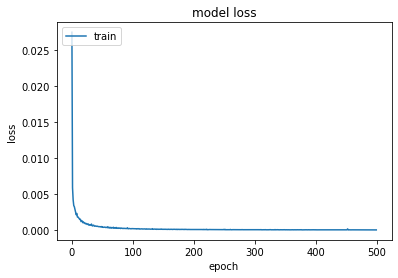

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

<class 'pandas.core.frame.DataFrame'>
(235, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

hand_z max is : 0.4099229762423224
hand_z min is : 0.05698730421795072
hand_x max is : 0.9526803792387778
hand_x min is : 0.5859430597247628
hand_y max is : 1.0723921154893272
hand_y min is : 0.7436435363136658
hand_z max is : 0.5364807407684336
hand_z min is : 0.03751754497237245
hand_x max is : 0.9532050666118402
hand_x min is : 0.7182828095117335
hand_y max is : 1.0723921154924043
hand_y min is : 0.7874838585840966
hand_z max is : 0.4491884082347085
hand_z min is : 0.046540713599843415
hand_x_max_arr is : 
[0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402]
0.9548262497780282
hand_x_min_arr is : 
[0.6878815783593673, 0.7064161667824996, 0.6717803631085324, 0.7421045083853685, 0.5

<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.744449     0.492039       0.495656      0.031419      0.504048   
1       0.744449     0.492039       0.495656      0.031419      0.504048   
2       0.744449     0.492039       0.495656      0.031419      0.504048   
3       0.744449     0.492039       0.495656      0.031419      0.504048   
4       0.744449     0.492039       0.495656      0.031419      0.504048   
5       0.744449     0.492039       0.495656      0.031419      0.504048   
6       0.744449     0.492039       0.495656      0.031419      0.504048   
7       0.744449     0.492039       0.495656      0.031419      0.504048   
8       0.744449     0.492039       0.495656      0.031419      0.504048   
9       0.744449     0.492039       0.495656      0.031419      0.504048   
10      0.744449     0.492039       0.495656      0.031419      0.504048   
11      0.744449     0.492039       0.495656      

Epoch 1/500
1245/1245 [==============================] - 7s 6ms/step - loss: 0.0278
Epoch 2/500
1245/1245 [==============================] - 3s 3ms/step - loss: 0.0062
Epoch 3/500
1245/1245 [==============================] - 3s 3ms/step - loss: 0.0046
Epoch 4/500
1245/1245 [==============================] - 3s 3ms/step - loss: 0.0038
Epoch 5/500
1245/1245 [==============================] - 3s 3ms/step - loss: 0.0037
Epoch 6/500
1245/1245 [==============================] - 3s 3ms/step - loss: 0.0026
Epoch 7/500
1245/1245 [==============================] - 3s 3ms/step - loss: 0.0026
Epoch 8/500
1245/1245 [==============================] - 3s 3ms/step - loss: 0.0024
Epoch 9/500
1245/1245 [==============================] - 3s 3ms/step - loss: 0.0023
Epoch 10/500
1245/1245 [==============================] - 3s 3ms/step - loss: 0.0018A: 2
Epoch 11/500
1245/1245 [==============================] - 3s 3ms/step - loss: 0.0018
Epoch 12/500
1245/1245 [==============================] - 3s 3ms/step 

1245/1245 [==============================] - 3s 3ms/step - loss: 2.5037e-04
Epoch 94/500
1245/1245 [==============================] - 3s 3ms/step - loss: 2.0592e-04
Epoch 95/500
1245/1245 [==============================] - 3s 3ms/step - loss: 2.1003e-04
Epoch 96/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.6562e-04
Epoch 97/500
1245/1245 [==============================] - 3s 3ms/step - loss: 2.1864e-04
Epoch 98/500
1245/1245 [==============================] - 3s 3ms/step - loss: 2.2172e-04
Epoch 99/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.8717e-04
Epoch 100/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.8678e-04
Epoch 101/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.7903e-04
Epoch 102/500
1245/1245 [==============================] - 3s 3ms/step - loss: 2.2093e-04
Epoch 103/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.5882e-04
Epoch 104/500
1245/1245 [=====

1245/1245 [==============================] - 3s 3ms/step - loss: 1.3102e-04
Epoch 184/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.0333e-04
Epoch 185/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.1833e-04
Epoch 186/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.1371e-04
Epoch 187/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.2097e-04
Epoch 188/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.1712e-04
Epoch 189/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.0376e-04
Epoch 190/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.0861e-04
Epoch 191/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.3004e-04
Epoch 192/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.0305e-04
Epoch 193/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.1775e-04
Epoch 194/500
1245/1245 

1245/1245 [==============================] - 3s 3ms/step - loss: 8.4942e-05
Epoch 275/500
1245/1245 [==============================] - 3s 3ms/step - loss: 9.2245e-05
Epoch 276/500
1245/1245 [==============================] - 3s 3ms/step - loss: 1.0311e-04
Epoch 277/500
1245/1245 [==============================] - 3s 3ms/step - loss: 7.2478e-05
Epoch 278/500
1245/1245 [==============================] - 3s 3ms/step - loss: 7.6751e-05
Epoch 279/500
1245/1245 [==============================] - 3s 3ms/step - loss: 8.5667e-05
Epoch 280/500
1245/1245 [==============================] - 3s 3ms/step - loss: 8.0597e-05
Epoch 281/500
1245/1245 [==============================] - 3s 3ms/step - loss: 8.5461e-05
Epoch 282/500
1245/1245 [==============================] - 3s 3ms/step - loss: 9.5407e-05
Epoch 283/500
1245/1245 [==============================] - 3s 3ms/step - loss: 8.8489e-05
Epoch 284/500
1245/1245 [==============================] - 3s 3ms/step - loss: 7.9874e-05
Epoch 285/500
1245/1245 

Epoch 365/500
1245/1245 [==============================] - 3s 3ms/step - loss: 7.0260e-05
Epoch 366/500
1245/1245 [==============================] - 3s 3ms/step - loss: 6.7804e-05
Epoch 367/500
1245/1245 [==============================] - 3s 3ms/step - loss: 7.1497e-05
Epoch 368/500
1245/1245 [==============================] - 3s 3ms/step - loss: 8.9737e-05
Epoch 369/500
1245/1245 [==============================] - 3s 3ms/step - loss: 6.7565e-05
Epoch 370/500
1245/1245 [==============================] - 3s 3ms/step - loss: 7.6561e-05
Epoch 371/500
1245/1245 [==============================] - 3s 3ms/step - loss: 7.5130e-05
Epoch 372/500
1245/1245 [==============================] - 3s 3ms/step - loss: 7.3846e-05
Epoch 373/500
1245/1245 [==============================] - 3s 3ms/step - loss: 7.9166e-05
Epoch 374/500
1245/1245 [==============================] - 3s 3ms/step - loss: 7.9075e-05
Epoch 375/500
1245/1245 [==============================] - 3s 3ms/step - loss: 6.4377e-05
Epoch 376/

1245/1245 [==============================] - 3s 3ms/step - loss: 6.7762e-05
Epoch 457/500
1245/1245 [==============================] - 3s 3ms/step - loss: 6.8687e-05
Epoch 458/500
1245/1245 [==============================] - 3s 3ms/step - loss: 6.8766e-05
Epoch 459/500
1245/1245 [==============================] - 3s 3ms/step - loss: 6.0973e-05
Epoch 460/500
1245/1245 [==============================] - 3s 3ms/step - loss: 6.6810e-05
Epoch 461/500
1245/1245 [==============================] - 3s 3ms/step - loss: 6.3544e-05
Epoch 462/500
1245/1245 [==============================] - 3s 3ms/step - loss: 6.5510e-05
Epoch 463/500
1245/1245 [==============================] - 3s 3ms/step - loss: 7.0374e-05
Epoch 464/500
1245/1245 [==============================] - 3s 3ms/step - loss: 6.2459e-05
Epoch 465/500
1245/1245 [==============================] - 3s 3ms/step - loss: 6.3539e-05
Epoch 466/500
1245/1245 [==============================] - 3s 3ms/step - loss: 6.5842e-05
Epoch 467/500
1245/1245 

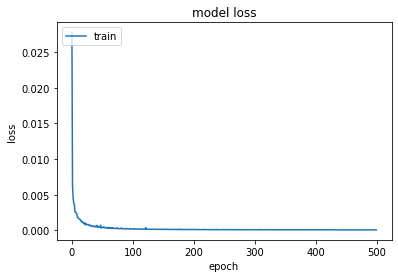

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

<class 'pandas.core.frame.DataFrame'>
(255, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

hand_y max is : 1.0723921155088898
hand_y min is : 0.7792901679254952
hand_z max is : 0.4099229762423224
hand_z min is : 0.05698730421795072
hand_x max is : 0.9526803792387778
hand_x min is : 0.5859430597247628
hand_y max is : 1.0723921154893272
hand_y min is : 0.7436435363136658
hand_z max is : 0.5364807407684336
hand_z min is : 0.03751754497237245
hand_x max is : 0.9532050666118402
hand_x min is : 0.7182828095117335
hand_y max is : 1.0723921154924043
hand_y min is : 0.7874838585840966
hand_z max is : 0.4491884082347085
hand_z min is : 0.046540713599843415
hand_x_max_arr is : 
[0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.952900880119

<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.744449     0.492039       0.495656      0.031419      0.504048   
1       0.744449     0.492039       0.495656      0.031419      0.504048   
2       0.744449     0.492039       0.495656      0.031419      0.504048   
3       0.744449     0.492039       0.495656      0.031419      0.504048   
4       0.744449     0.492039       0.495656      0.031419      0.504048   
5       0.744449     0.492039       0.495656      0.031419      0.504048   
6       0.744449     0.492039       0.495656      0.031419      0.504048   
7       0.744449     0.492039       0.495656      0.031419      0.504048   
8       0.744449     0.492039       0.495656      0.031419      0.504048   
9       0.744449     0.492039       0.495656      0.031419      0.504048   
10      0.744449     0.492039       0.495656      0.031419      0.504048   
11      0.744449     0.492039       0.495656      

Epoch 1/500
1305/1305 [==============================] - 10s 7ms/step - loss: 0.0263
Epoch 2/500
1305/1305 [==============================] - 5s 4ms/step - loss: 0.0069
Epoch 3/500
1305/1305 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 4/500
1305/1305 [==============================] - 5s 4ms/step - loss: 0.0039
Epoch 5/500
1305/1305 [==============================] - 5s 4ms/step - loss: 0.0031
Epoch 6/500
1305/1305 [==============================] - 5s 4ms/step - loss: 0.0031
Epoch 7/500
1305/1305 [==============================] - 5s 4ms/step - loss: 0.0021
Epoch 8/500
1305/1305 [==============================] - 5s 4ms/step - loss: 0.0020
Epoch 9/500
1305/1305 [==============================] - 5s 4ms/step - loss: 0.0021
Epoch 10/500
1305/1305 [==============================] - 5s 4ms/step - loss: 0.0017
Epoch 11/500
1305/1305 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 12/500
1305/1305 [==============================] - 5s 4ms/step - l

1305/1305 [==============================] - 5s 4ms/step - loss: 1.9562e-04
Epoch 94/500
1305/1305 [==============================] - 5s 4ms/step - loss: 1.6323e-04
Epoch 95/500
1305/1305 [==============================] - 5s 4ms/step - loss: 1.8950e-04
Epoch 96/500
1305/1305 [==============================] - 5s 4ms/step - loss: 1.4769e-04
Epoch 97/500
1305/1305 [==============================] - 5s 4ms/step - loss: 2.0121e-04
Epoch 98/500
1305/1305 [==============================] - 5s 4ms/step - loss: 1.5936e-04
Epoch 99/500
1305/1305 [==============================] - 5s 4ms/step - loss: 1.7224e-04
Epoch 100/500
1305/1305 [==============================] - 5s 4ms/step - loss: 1.5168e-04
Epoch 101/500
1305/1305 [==============================] - 5s 4ms/step - loss: 1.9603e-04
Epoch 102/500
1305/1305 [==============================] - 5s 4ms/step - loss: 1.7876e-04
Epoch 103/500
1305/1305 [==============================] - 5s 4ms/step - loss: 1.6339e-04
Epoch 104/500
1305/1305 [=====

1305/1305 [==============================] - 5s 4ms/step - loss: 1.2552e-04
Epoch 185/500
1305/1305 [==============================] - 5s 4ms/step - loss: 1.0029e-04
Epoch 186/500
1305/1305 [==============================] - 5s 4ms/step - loss: 1.0573e-04
Epoch 187/500
1305/1305 [==============================] - 5s 4ms/step - loss: 8.7620e-05
Epoch 188/500
1305/1305 [==============================] - 5s 4ms/step - loss: 1.3709e-04
Epoch 189/500
1305/1305 [==============================] - 5s 4ms/step - loss: 1.2231e-04
Epoch 190/500
1305/1305 [==============================] - 5s 4ms/step - loss: 1.2342e-04
Epoch 191/500
1305/1305 [==============================] - 5s 4ms/step - loss: 9.2487e-05
Epoch 192/500
1305/1305 [==============================] - 5s 4ms/step - loss: 9.8922e-05
Epoch 193/500
1305/1305 [==============================] - 5s 4ms/step - loss: 9.5306e-05
Epoch 194/500
1305/1305 [==============================] - 5s 4ms/step - loss: 1.0597e-04
Epoch 195/500
1305/1305 

1305/1305 [==============================] - 5s 4ms/step - loss: 8.9351e-05
Epoch 276/500
1305/1305 [==============================] - 5s 4ms/step - loss: 7.6706e-05
Epoch 277/500
1305/1305 [==============================] - 5s 4ms/step - loss: 7.5530e-05
Epoch 278/500
1305/1305 [==============================] - 5s 4ms/step - loss: 7.9476e-05
Epoch 279/500
1305/1305 [==============================] - 5s 4ms/step - loss: 9.4268e-05
Epoch 280/500
1305/1305 [==============================] - 5s 4ms/step - loss: 7.2810e-05
Epoch 281/500
1305/1305 [==============================] - 5s 4ms/step - loss: 7.9273e-05
Epoch 282/500
1305/1305 [==============================] - 5s 4ms/step - loss: 8.0056e-05
Epoch 283/500
1305/1305 [==============================] - 5s 4ms/step - loss: 7.7212e-05
Epoch 284/500
1305/1305 [==============================] - 5s 4ms/step - loss: 9.8633e-05
Epoch 285/500
1305/1305 [==============================] - 5s 4ms/step - loss: 7.8374e-05
Epoch 286/500
1305/1305 

1305/1305 [==============================] - 5s 4ms/step - loss: 7.0220e-05
Epoch 367/500
1305/1305 [==============================] - 5s 4ms/step - loss: 7.8778e-05
Epoch 368/500
1305/1305 [==============================] - 5s 4ms/step - loss: 7.8309e-05
Epoch 369/500
1305/1305 [==============================] - 5s 4ms/step - loss: 6.2534e-05
Epoch 370/500
1305/1305 [==============================] - 5s 4ms/step - loss: 6.7683e-05
Epoch 371/500
1305/1305 [==============================] - 5s 4ms/step - loss: 6.5287e-05
Epoch 372/500
1305/1305 [==============================] - 5s 4ms/step - loss: 7.2598e-05
Epoch 373/500
1305/1305 [==============================] - 5s 4ms/step - loss: 6.6030e-05
Epoch 374/500
1305/1305 [==============================] - 5s 4ms/step - loss: 6.8154e-05
Epoch 375/500
1305/1305 [==============================] - 5s 4ms/step - loss: 7.1285e-05
Epoch 376/500
1305/1305 [==============================] - 5s 4ms/step - loss: 6.5451e-05
Epoch 377/500
1305/1305 

1305/1305 [==============================] - 5s 4ms/step - loss: 5.8310e-05
Epoch 458/500
1305/1305 [==============================] - 5s 4ms/step - loss: 6.7508e-05
Epoch 459/500
1305/1305 [==============================] - 5s 4ms/step - loss: 5.8248e-05
Epoch 460/500
1305/1305 [==============================] - 5s 4ms/step - loss: 8.8710e-05
Epoch 461/500
1305/1305 [==============================] - 5s 4ms/step - loss: 7.9738e-05
Epoch 462/500
1305/1305 [==============================] - 5s 4ms/step - loss: 5.8597e-05
Epoch 463/500
1305/1305 [==============================] - 5s 4ms/step - loss: 6.1010e-05
Epoch 464/500
1305/1305 [==============================] - 5s 4ms/step - loss: 6.2186e-05
Epoch 465/500
1305/1305 [==============================] - 5s 4ms/step - loss: 8.7352e-05
Epoch 466/500
1305/1305 [==============================] - 5s 4ms/step - loss: 5.4618e-05
Epoch 467/500
1305/1305 [==============================] - 5s 4ms/step - loss: 5.9001e-05
Epoch 468/500
1305/1305 

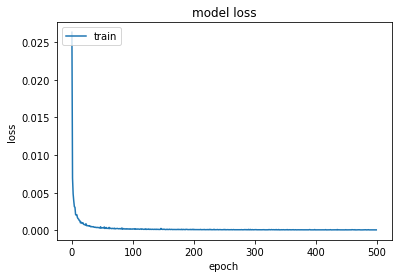

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

[235 rows x 38 columns]
<class 'pandas.core.frame.DataFrame'>
(275, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.50

hand_z max is : 0.3348836197284272
hand_z min is : 0.04366723176483128
hand_x max is : 0.9529008801190858
hand_x min is : 0.6717803631085324
hand_y max is : 1.0723921154923597
hand_y min is : 0.7704245915707718
hand_z max is : 0.4256143977285175
hand_z min is : 0.06687830778544702
hand_x max is : 0.9543508660329038
hand_x min is : 0.7421045083853685
hand_y max is : 1.0723921155088898
hand_y min is : 0.7792901679254952
hand_z max is : 0.4099229762423224
hand_z min is : 0.05698730421795072
hand_x max is : 0.9526803792387778
hand_x min is : 0.5859430597247628
hand_y max is : 1.0723921154893272
hand_y min is : 0.7436435363136658
hand_z max is : 0.5364807407684336
hand_z min is : 0.03751754497237245
hand_x max is : 0.9532050666118402
hand_x min is : 0.7182828095117335
hand_y max is : 1.0723921154924043
hand_y min is : 0.7874838585840966
hand_z max is : 0.4491884082347085
hand_z min is : 0.046540713599843415
hand_x_max_arr is : 
[0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.

[275 rows x 16 columns]
<class 'pandas.core.frame.DataFrame'>
(275, 16)
<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.743188     0.498898       0.497298      0.020865       0.50605   
1       0.743188     0.498898       0.497298      0.020865       0.50605   
2       0.743188     0.498898       0.497298      0.020865       0.50605   
3       0.743188     0.498898       0.497298      0.020865       0.50605   
4       0.743188     0.498898       0.497298      0.020865       0.50605   
5       0.743188     0.498898       0.497298      0.020865       0.50605   
6       0.743188     0.498898       0.497298      0.020865       0.50605   
7       0.743188     0.498898       0.497298      0.020865       0.50605   
8       0.743188     0.498898       0.497298      0.020865       0.50605   
9       0.743188     0.498898       0.497298      0.020865       0.50605   
10      0.743188     0.498898       0.497298      0.02

Epoch 1/500
1365/1365 [==============================] - 12s 9ms/step - loss: 0.0267
Epoch 2/500
1365/1365 [==============================] - 7s 5ms/step - loss: 0.0070
Epoch 3/500
1365/1365 [==============================] - 7s 5ms/step - loss: 0.0050
Epoch 4/500
1365/1365 [==============================] - 7s 5ms/step - loss: 0.0039
Epoch 5/500
1365/1365 [==============================] - 7s 5ms/step - loss: 0.0030
Epoch 6/500
1365/1365 [==============================] - 7s 5ms/step - loss: 0.0029
Epoch 7/500
1365/1365 [==============================] - 7s 5ms/step - loss: 0.0025
Epoch 8/500
1365/1365 [==============================] - 7s 5ms/step - loss: 0.0020
Epoch 9/500
1365/1365 [==============================] - 7s 5ms/step - loss: 0.0020
Epoch 10/500
1365/1365 [==============================] - 7s 5ms/step - loss: 0.0017
Epoch 11/500
1365/1365 [==============================] - 7s 5ms/step - loss: 0.0018
Epoch 12/500
1365/1365 [==============================] - 7s 5ms/step - l

1365/1365 [==============================] - 7s 5ms/step - loss: 1.6712e-04
Epoch 94/500
1365/1365 [==============================] - 7s 5ms/step - loss: 2.0587e-04
Epoch 95/500
1365/1365 [==============================] - 7s 5ms/step - loss: 1.5188e-04
Epoch 96/500
1365/1365 [==============================] - 7s 5ms/step - loss: 2.1152e-04
Epoch 97/500
1365/1365 [==============================] - 7s 5ms/step - loss: 1.4565e-04
Epoch 98/500
1365/1365 [==============================] - 7s 5ms/step - loss: 2.1909e-04
Epoch 99/500
1365/1365 [==============================] - 7s 5ms/step - loss: 1.3597e-04
Epoch 100/500
1365/1365 [==============================] - 7s 5ms/step - loss: 1.8167e-04
Epoch 101/500
1365/1365 [==============================] - 7s 5ms/step - loss: 1.5954e-04
Epoch 102/500
1365/1365 [==============================] - 7s 5ms/step - loss: 1.7883e-04
Epoch 103/500
1365/1365 [==============================] - 7s 5ms/step - loss: 1.4663e-04
Epoch 104/500
1365/1365 [=====

1365/1365 [==============================] - 7s 5ms/step - loss: 8.8496e-05
Epoch 185/500
1365/1365 [==============================] - 7s 5ms/step - loss: 1.3980e-04
Epoch 186/500
1365/1365 [==============================] - 7s 5ms/step - loss: 8.9116e-05
Epoch 187/500
1365/1365 [==============================] - 7s 5ms/step - loss: 9.3278e-05
Epoch 188/500
1365/1365 [==============================] - 7s 5ms/step - loss: 1.2116e-04
Epoch 189/500
1365/1365 [==============================] - 7s 5ms/step - loss: 8.8859e-05
Epoch 190/500
1365/1365 [==============================] - 7s 5ms/step - loss: 9.3836e-05
Epoch 191/500
1365/1365 [==============================] - 7s 5ms/step - loss: 9.5816e-05
Epoch 192/500
1365/1365 [==============================] - 7s 5ms/step - loss: 1.0654e-04
Epoch 193/500
1365/1365 [==============================] - 7s 5ms/step - loss: 8.9249e-05
Epoch 194/500
1365/1365 [==============================] - 7s 5ms/step - loss: 9.4830e-05
Epoch 195/500
1365/1365 

1365/1365 [==============================] - 7s 5ms/step - loss: 7.2363e-05
Epoch 276/500
1365/1365 [==============================] - 7s 5ms/step - loss: 7.6171e-05
Epoch 277/500
1365/1365 [==============================] - 7s 5ms/step - loss: 8.2880e-05
Epoch 278/500
1365/1365 [==============================] - 7s 5ms/step - loss: 7.0262e-05
Epoch 279/500
1365/1365 [==============================] - 7s 5ms/step - loss: 7.3694e-05
Epoch 280/500
1365/1365 [==============================] - 7s 5ms/step - loss: 6.9942e-05
Epoch 281/500
1365/1365 [==============================] - 7s 5ms/step - loss: 9.0473e-05
Epoch 282/500
1365/1365 [==============================] - 7s 5ms/step - loss: 6.4715e-05
Epoch 283/500
1365/1365 [==============================] - 7s 5ms/step - loss: 7.5369e-05
Epoch 284/500
1365/1365 [==============================] - 7s 5ms/step - loss: 7.0363e-05
Epoch 285/500
1365/1365 [==============================] - 7s 5ms/step - loss: 7.1629e-05
Epoch 286/500
1365/1365 

1365/1365 [==============================] - 7s 5ms/step - loss: 5.7853e-05
Epoch 367/500
1365/1365 [==============================] - 7s 5ms/step - loss: 6.8197e-05
Epoch 368/500
1365/1365 [==============================] - 7s 5ms/step - loss: 5.9884e-05
Epoch 369/500
1365/1365 [==============================] - 7s 5ms/step - loss: 6.1425e-05
Epoch 370/500
1365/1365 [==============================] - 7s 5ms/step - loss: 1.0718e-04
Epoch 371/500
1365/1365 [==============================] - 7s 5ms/step - loss: 5.8564e-05
Epoch 372/500
1365/1365 [==============================] - 7s 5ms/step - loss: 6.0154e-05
Epoch 373/500
1365/1365 [==============================] - 7s 5ms/step - loss: 6.4103e-05
Epoch 374/500
1365/1365 [==============================] - 7s 5ms/step - loss: 6.4263e-05
Epoch 375/500
1365/1365 [==============================] - 7s 5ms/step - loss: 5.8163e-05
Epoch 376/500
1365/1365 [==============================] - 7s 5ms/step - loss: 6.2563e-05
Epoch 377/500
1365/1365 

1365/1365 [==============================] - 7s 5ms/step - loss: 5.5717e-05
Epoch 458/500
1365/1365 [==============================] - 7s 5ms/step - loss: 5.5805e-05
Epoch 459/500
1365/1365 [==============================] - 7s 5ms/step - loss: 7.9940e-05
Epoch 460/500
1365/1365 [==============================] - 7s 5ms/step - loss: 5.8522e-05
Epoch 461/500
1365/1365 [==============================] - 7s 5ms/step - loss: 5.1895e-05
Epoch 462/500
1365/1365 [==============================] - 7s 5ms/step - loss: 5.7407e-05
Epoch 463/500
1365/1365 [==============================] - 7s 5ms/step - loss: 5.7883e-05
Epoch 464/500
1365/1365 [==============================] - 7s 5ms/step - loss: 5.4876e-05
Epoch 465/500
1365/1365 [==============================] - 7s 5ms/step - loss: 5.4716e-05
Epoch 466/500
1365/1365 [==============================] - 7s 5ms/step - loss: 7.3879e-05
Epoch 467/500
1365/1365 [==============================] - 7s 5ms/step - loss: 5.5310e-05
Epoch 468/500
1365/1365 

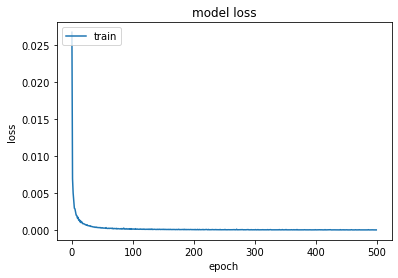

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

[255 rows x 38 columns]
<class 'pandas.core.frame.DataFrame'>
(295, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.50

<class 'pandas.core.frame.DataFrame'>
(284, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.743548     0.493127       0.494005      0.031840      0.505729   
1       0.743548     0.493127       0.494005      0.031840      0.505729   
2       0.743548     0.493127       0.494005      0.031840      0.505729   
3       0.743548     0.493127       0.494005      0.031840      0.505729   
4       0.743548     0.493127       0.494005      0.031840      0.505729   
5       0.743548     0.493127       0.494005      0.031840      0.505729   
6       0.743548     0.493127       0.494005      0.031840      0.505729   
7       0.743548     0.493127       0.494005      0.031840      0.505729   
8       0.743548     0.493127       0.494005      0.031840      0.505729   
9       0.743548     0.493127       0.494005      0.031840      0.505729   
10      0.743548     0.493127       0.494005      0.031840      0.505729   
11      0.743548     0.493127       0.494005      

(1425, 50, 21)
(1425, 16)
Epoch 1/500
1425/1425 [==============================] - 15s 10ms/step - loss: 0.0266
Epoch 2/500
1425/1425 [==============================] - 10s 7ms/step - loss: 0.0071
Epoch 3/500
1425/1425 [==============================] - 9s 7ms/step - loss: 0.0046
Epoch 4/500
1425/1425 [==============================] - 10s 7ms/step - loss: 0.0041
Epoch 5/500
1425/1425 [==============================] - 10s 7ms/step - loss: 0.0032
Epoch 6/500
1425/1425 [==============================] - 10s 7ms/step - loss: 0.0028
Epoch 7/500
1425/1425 [==============================] - 9s 7ms/step - loss: 0.0023
Epoch 8/500
1425/1425 [==============================] - 10s 7ms/step - loss: 0.0020
Epoch 9/500
1425/1425 [==============================] - 9s 7ms/step - loss: 0.0018
Epoch 10/500
1425/1425 [==============================] - 9s 7ms/step - loss: 0.0018
Epoch 11/500
1425/1425 [==============================] - 10s 7ms/step - loss: 0.0016
Epoch 12/500
1425/1425 [================

1425/1425 [==============================] - 9s 7ms/step - loss: 1.5311e-04
Epoch 94/500
1425/1425 [==============================] - 9s 7ms/step - loss: 1.5127e-04
Epoch 95/500
1425/1425 [==============================] - 10s 7ms/step - loss: 1.5672e-04
Epoch 96/500
1425/1425 [==============================] - 9s 7ms/step - loss: 2.0540e-04
Epoch 97/500
1425/1425 [==============================] - 9s 7ms/step - loss: 1.7304e-04
Epoch 98/500
1425/1425 [==============================] - 10s 7ms/step - loss: 1.7267e-04
Epoch 99/500
1425/1425 [==============================] - 9s 7ms/step - loss: 1.3533e-04
Epoch 100/500
1425/1425 [==============================] - 10s 7ms/step - loss: 1.6833e-04
Epoch 101/500
1425/1425 [==============================] - 10s 7ms/step - loss: 1.4659e-04
Epoch 102/500
1425/1425 [==============================] - 10s 7ms/step - loss: 1.4139e-04
Epoch 103/500
1425/1425 [==============================] - 10s 7ms/step - loss: 1.5154e-04
Epoch 104/500
1425/1425 

1425/1425 [==============================] - 9s 7ms/step - loss: 8.4241e-05
Epoch 184/500
1425/1425 [==============================] - 10s 7ms/step - loss: 9.1846e-05
Epoch 185/500
1425/1425 [==============================] - 9s 7ms/step - loss: 8.2119e-05
Epoch 186/500
1425/1425 [==============================] - 10s 7ms/step - loss: 9.8286e-05
Epoch 187/500
1425/1425 [==============================] - 10s 7ms/step - loss: 7.6086e-05
Epoch 188/500
1425/1425 [==============================] - 10s 7ms/step - loss: 8.7750e-05
Epoch 189/500
1425/1425 [==============================] - 10s 7ms/step - loss: 7.9944e-05
Epoch 190/500
1425/1425 [==============================] - 9s 7ms/step - loss: 8.2489e-05
Epoch 191/500
1425/1425 [==============================] - 10s 7ms/step - loss: 8.1577e-05
Epoch 192/500
1425/1425 [==============================] - 10s 7ms/step - loss: 8.3282e-05
Epoch 193/500
1425/1425 [==============================] - 10s 7ms/step - loss: 8.4562e-05
Epoch 194/500
14

1425/1425 [==============================] - 10s 7ms/step - loss: 6.1899e-05
Epoch 274/500
1425/1425 [==============================] - 10s 7ms/step - loss: 7.9321e-05
Epoch 275/500
1425/1425 [==============================] - 10s 7ms/step - loss: 6.3909e-05
Epoch 276/500
1425/1425 [==============================] - 9s 7ms/step - loss: 6.4905e-05
Epoch 277/500
1425/1425 [==============================] - 10s 7ms/step - loss: 6.1228e-05
Epoch 278/500
1425/1425 [==============================] - 10s 7ms/step - loss: 6.5147e-05
Epoch 279/500
1425/1425 [==============================] - 9s 7ms/step - loss: 6.9613e-05
Epoch 280/500
1425/1425 [==============================] - 10s 7ms/step - loss: 6.0606e-05
Epoch 281/500
1425/1425 [==============================] - 9s 7ms/step - loss: 6.8682e-05
Epoch 282/500
1425/1425 [==============================] - 10s 7ms/step - loss: 6.9210e-05
Epoch 283/500
1425/1425 [==============================] - 10s 7ms/step - loss: 6.1034e-05
Epoch 284/500
14

1425/1425 [==============================] - 9s 7ms/step - loss: 5.7671e-05
Epoch 364/500
1425/1425 [==============================] - 9s 7ms/step - loss: 5.4348e-05
Epoch 365/500
1425/1425 [==============================] - 9s 7ms/step - loss: 1.0860e-04
Epoch 366/500
1425/1425 [==============================] - 10s 7ms/step - loss: 5.2710e-05
Epoch 367/500
1425/1425 [==============================] - 9s 7ms/step - loss: 5.4174e-05
Epoch 368/500
1425/1425 [==============================] - 9s 7ms/step - loss: 5.6510e-05
Epoch 369/500
1425/1425 [==============================] - 10s 7ms/step - loss: 5.8061e-05
Epoch 370/500
1425/1425 [==============================] - 10s 7ms/step - loss: 5.1766e-05
Epoch 371/500
1425/1425 [==============================] - 9s 7ms/step - loss: 5.6438e-05
Epoch 372/500
1425/1425 [==============================] - 9s 7ms/step - loss: 5.7019e-05
Epoch 373/500
1425/1425 [==============================] - 10s 7ms/step - loss: 5.5454e-05
Epoch 374/500
1425/1

1425/1425 [==============================] - 10s 7ms/step - loss: 5.2184e-05
Epoch 454/500
1425/1425 [==============================] - 10s 7ms/step - loss: 4.8696e-05
Epoch 455/500
1425/1425 [==============================] - 10s 7ms/step - loss: 8.1343e-05
Epoch 456/500
1425/1425 [==============================] - 10s 7ms/step - loss: 4.5403e-05
Epoch 457/500
1425/1425 [==============================] - 10s 7ms/step - loss: 4.9171e-05
Epoch 458/500
1425/1425 [==============================] - 10s 7ms/step - loss: 4.9292e-05
Epoch 459/500
1425/1425 [==============================] - 10s 7ms/step - loss: 5.2286e-05
Epoch 460/500
1425/1425 [==============================] - 10s 7ms/step - loss: 5.0361e-05
Epoch 461/500
1425/1425 [==============================] - 9s 7ms/step - loss: 5.6880e-05
Epoch 462/500
1425/1425 [==============================] - 10s 7ms/step - loss: 4.5674e-05
Epoch 463/500
1425/1425 [==============================] - 10s 7ms/step - loss: 5.1908e-05
Epoch 464/500


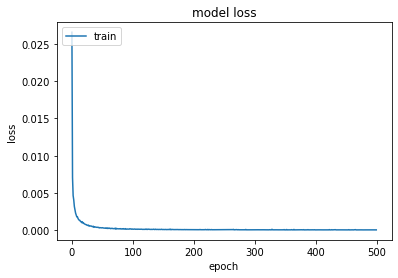

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

<class 'pandas.core.frame.DataFrame'>
(275, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.50

<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.743548     0.493127       0.494005      0.031840      0.505729   
1       0.743548     0.493127       0.494005      0.031840      0.505729   
2       0.743548     0.493127       0.494005      0.031840      0.505729   
3       0.743548     0.493127       0.494005      0.031840      0.505729   
4       0.743548     0.493127       0.494005      0.031840      0.505729   
5       0.743548     0.493127       0.494005      0.031840      0.505729   
6       0.743548     0.493127       0.494005      0.031840      0.505729   
7       0.743548     0.493127       0.494005      0.031840      0.505729   
8       0.743548     0.493127       0.494005      0.031840      0.505729   
9       0.743548     0.493127       0.494005      0.031840      0.505729   
10      0.743548     0.493127       0.494005      0.031840      0.505729   
11      0.743548     0.493127       0.494005      

(1485, 60, 21)
(1485, 16)
Epoch 1/500
1485/1485 [==============================] - 18s 12ms/step - loss: 0.0284
Epoch 2/500
1485/1485 [==============================] - 12s 8ms/step - loss: 0.0063
Epoch 3/500
1485/1485 [==============================] - 12s 8ms/step - loss: 0.0044
Epoch 4/500
1485/1485 [==============================] - 12s 8ms/step - loss: 0.0036
Epoch 5/500
1485/1485 [==============================] - 12s 8ms/step - loss: 0.0030
Epoch 6/500
1485/1485 [==============================] - 12s 8ms/step - loss: 0.0025
Epoch 7/500
1485/1485 [==============================] - 12s 8ms/step - loss: 0.0021
Epoch 8/500
1485/1485 [==============================] - 12s 8ms/step - loss: 0.0021
Epoch 9/500
1485/1485 [==============================] - 12s 8ms/step - loss: 0.0018
Epoch 10/500
1485/1485 [==============================] - 12s 8ms/step - loss: 0.0016
Epoch 11/500
1485/1485 [==============================] - 12s 8ms/step - loss: 0.0016
Epoch 12/500
1485/1485 [============

1485/1485 [==============================] - 12s 8ms/step - loss: 1.7873e-04
Epoch 93/500
1485/1485 [==============================] - 12s 8ms/step - loss: 2.0175e-04
Epoch 94/500
1485/1485 [==============================] - 12s 8ms/step - loss: 1.5379e-04
Epoch 95/500
1485/1485 [==============================] - 12s 8ms/step - loss: 1.6028e-04
Epoch 96/500
1485/1485 [==============================] - 12s 8ms/step - loss: 1.3710e-04
Epoch 97/500
1485/1485 [==============================] - 12s 8ms/step - loss: 1.4761e-04
Epoch 98/500
1485/1485 [==============================] - 12s 8ms/step - loss: 1.8764e-04
Epoch 99/500
1485/1485 [==============================] - 12s 8ms/step - loss: 1.3727e-04
Epoch 100/500
1485/1485 [==============================] - 12s 8ms/step - loss: 1.6774e-04
Epoch 101/500
1485/1485 [==============================] - 12s 8ms/step - loss: 1.3885e-04
Epoch 102/500
1485/1485 [==============================] - 12s 8ms/step - loss: 1.2764e-04
Epoch 103/500
1485/1

1485/1485 [==============================] - 12s 8ms/step - loss: 9.3244e-05
Epoch 183/500
1485/1485 [==============================] - 12s 8ms/step - loss: 8.3492e-05
Epoch 184/500
1485/1485 [==============================] - 12s 8ms/step - loss: 9.7892e-05
Epoch 185/500
1485/1485 [==============================] - 12s 8ms/step - loss: 8.6352e-05
Epoch 186/500
1485/1485 [==============================] - 12s 8ms/step - loss: 1.1693e-04
Epoch 187/500
1485/1485 [==============================] - 12s 8ms/step - loss: 8.0785e-05
Epoch 188/500
1485/1485 [==============================] - 12s 8ms/step - loss: 8.7945e-05
Epoch 189/500
1485/1485 [==============================] - 12s 8ms/step - loss: 8.2972e-05
Epoch 190/500
1485/1485 [==============================] - 12s 8ms/step - loss: 1.0129e-04
Epoch 191/500
1485/1485 [==============================] - 12s 8ms/step - loss: 9.0183e-05
Epoch 192/500
1485/1485 [==============================] - 12s 8ms/step - loss: 8.4044e-05
Epoch 193/500

1485/1485 [==============================] - 12s 8ms/step - loss: 6.8956e-05
Epoch 273/500
1485/1485 [==============================] - 12s 8ms/step - loss: 6.6405e-05
Epoch 274/500
1485/1485 [==============================] - 12s 8ms/step - loss: 6.8128e-05
Epoch 275/500
1485/1485 [==============================] - 12s 8ms/step - loss: 6.8571e-05
Epoch 276/500
1485/1485 [==============================] - 12s 8ms/step - loss: 6.9747e-05
Epoch 277/500
1485/1485 [==============================] - 12s 8ms/step - loss: 6.7139e-05
Epoch 278/500
1485/1485 [==============================] - 12s 8ms/step - loss: 6.9454e-05
Epoch 279/500
1485/1485 [==============================] - 12s 8ms/step - loss: 6.5997e-05
Epoch 280/500
1485/1485 [==============================] - 12s 8ms/step - loss: 1.0305e-04
Epoch 281/500
1485/1485 [==============================] - 12s 8ms/step - loss: 6.4406e-05
Epoch 282/500
1485/1485 [==============================] - 12s 8ms/step - loss: 7.2319e-05
Epoch 283/500

1485/1485 [==============================] - 12s 8ms/step - loss: 5.9246e-05
Epoch 363/500
1485/1485 [==============================] - 12s 8ms/step - loss: 5.8008e-05
Epoch 364/500
1485/1485 [==============================] - 12s 8ms/step - loss: 6.1517e-05
Epoch 365/500
1485/1485 [==============================] - 12s 8ms/step - loss: 5.4225e-05
Epoch 366/500
1485/1485 [==============================] - 12s 8ms/step - loss: 6.2045e-05
Epoch 367/500
1485/1485 [==============================] - 12s 8ms/step - loss: 5.7968e-05
Epoch 368/500
1485/1485 [==============================] - 12s 8ms/step - loss: 5.8175e-05
Epoch 369/500
1485/1485 [==============================] - 12s 8ms/step - loss: 5.8340e-05
Epoch 370/500
1485/1485 [==============================] - 12s 8ms/step - loss: 6.0956e-05
Epoch 371/500
1485/1485 [==============================] - 12s 8ms/step - loss: 5.4442e-05
Epoch 372/500
1485/1485 [==============================] - 12s 8ms/step - loss: 5.8721e-05
Epoch 373/500

1485/1485 [==============================] - 12s 8ms/step - loss: 4.8206e-05
Epoch 453/500
1485/1485 [==============================] - 12s 8ms/step - loss: 4.8295e-05
Epoch 454/500
1485/1485 [==============================] - 12s 8ms/step - loss: 5.4780e-05
Epoch 455/500
1485/1485 [==============================] - 12s 8ms/step - loss: 5.3119e-05
Epoch 456/500
1485/1485 [==============================] - 12s 8ms/step - loss: 4.9693e-05
Epoch 457/500
1485/1485 [==============================] - 12s 8ms/step - loss: 5.3610e-05
Epoch 458/500
1485/1485 [==============================] - 12s 8ms/step - loss: 5.0717e-05
Epoch 459/500
1485/1485 [==============================] - 12s 8ms/step - loss: 5.4754e-05
Epoch 460/500
1485/1485 [==============================] - 12s 8ms/step - loss: 4.8426e-05
Epoch 461/500
1485/1485 [==============================] - 12s 8ms/step - loss: 5.3933e-05
Epoch 462/500
1485/1485 [==============================] - 12s 8ms/step - loss: 5.0221e-05
Epoch 463/500

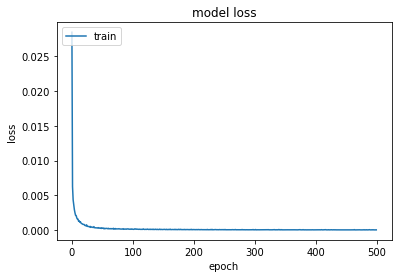

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

<class 'pandas.core.frame.DataFrame'>
(295, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

<class 'pandas.core.frame.DataFrame'>
(337, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

hand_y max is : 1.0723921154924043
hand_y min is : 0.7874838585840966
hand_z max is : 0.4491884082347085
hand_z min is : 0.046540713599843415
hand_x_max_arr is : 
[0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.95320506661184

<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.744449     0.492039       0.495656      0.031419      0.504048   
1       0.744449     0.492039       0.495656      0.031419      0.504048   
2       0.744449     0.492039       0.495656      0.031419      0.504048   
3       0.744449     0.492039       0.495656      0.031419      0.504048   
4       0.744449     0.492039       0.495656      0.031419      0.504048   
5       0.744449     0.492039       0.495656      0.031419      0.504048   
6       0.744449     0.492039       0.495656      0.031419      0.504048   
7       0.744449     0.492039       0.495656      0.031419      0.504048   
8       0.744449     0.492039       0.495656      0.031419      0.504048   
9       0.744449     0.492039       0.495656      0.031419      0.504048   
10      0.744449     0.492039       0.495656      0.031419      0.504048   
11      0.744449     0.492039       0.495656      

Epoch 1/500
1545/1545 [==============================] - 21s 14ms/step - loss: 0.0244
Epoch 2/500
1545/1545 [==============================] - 15s 10ms/step - loss: 0.0063
Epoch 3/500
1545/1545 [==============================] - 15s 10ms/step - loss: 0.0045
Epoch 4/500
1545/1545 [==============================] - 15s 10ms/step - loss: 0.0036
Epoch 5/500
1545/1545 [==============================] - 15s 10ms/step - loss: 0.0031
Epoch 6/500
1545/1545 [==============================] - 15s 10ms/step - loss: 0.0024
Epoch 7/500
1545/1545 [==============================] - 15s 10ms/step - loss: 0.0024
Epoch 8/500
1545/1545 [==============================] - 15s 10ms/step - loss: 0.0021
Epoch 9/500
1545/1545 [==============================] - 15s 10ms/step - loss: 0.0019
Epoch 10/500
1545/1545 [==============================] - 15s 10ms/step - loss: 0.0016
Epoch 11/500
1545/1545 [==============================] - 15s 10ms/step - loss: 0.0017
Epoch 12/500
1545/1545 [============================

1545/1545 [==============================] - 15s 10ms/step - loss: 1.5342e-04
Epoch 92/500
1545/1545 [==============================] - 15s 10ms/step - loss: 1.8135e-04
Epoch 93/500
1545/1545 [==============================] - 15s 10ms/step - loss: 1.5133e-04
Epoch 94/500
1545/1545 [==============================] - 15s 10ms/step - loss: 1.5412e-04
Epoch 95/500
1545/1545 [==============================] - 15s 10ms/step - loss: 1.6422e-04
Epoch 96/500
1545/1545 [==============================] - 15s 10ms/step - loss: 1.5948e-04
Epoch 97/500
1545/1545 [==============================] - 15s 10ms/step - loss: 1.6830e-04
Epoch 98/500
1545/1545 [==============================] - 14s 9ms/step - loss: 1.5213e-04
Epoch 99/500
1545/1545 [==============================] - 15s 9ms/step - loss: 1.6417e-04
Epoch 100/500
1545/1545 [==============================] - 15s 10ms/step - loss: 1.4324e-04
Epoch 101/500
1545/1545 [==============================] - 15s 10ms/step - loss: 1.4251e-04
Epoch 102/50

1545/1545 [==============================] - 15s 10ms/step - loss: 1.0186e-04
Epoch 181/500
1545/1545 [==============================] - 15s 10ms/step - loss: 8.2528e-05
Epoch 182/500
1545/1545 [==============================] - 15s 10ms/step - loss: 9.5456e-05
Epoch 183/500
1545/1545 [==============================] - 15s 10ms/step - loss: 8.6196e-05
Epoch 184/500
1545/1545 [==============================] - 15s 10ms/step - loss: 8.2563e-05
Epoch 185/500
1545/1545 [==============================] - 15s 10ms/step - loss: 9.1295e-05
Epoch 186/500
1545/1545 [==============================] - 15s 10ms/step - loss: 9.9297e-05
Epoch 187/500
1545/1545 [==============================] - 15s 10ms/step - loss: 8.2018e-05
Epoch 188/500
1545/1545 [==============================] - 15s 10ms/step - loss: 8.9157e-05
Epoch 189/500
1545/1545 [==============================] - 15s 10ms/step - loss: 7.7747e-05
Epoch 190/500
1545/1545 [==============================] - 15s 10ms/step - loss: 8.8876e-05
Ep

1545/1545 [==============================] - 15s 10ms/step - loss: 6.9058e-05
Epoch 270/500
1545/1545 [==============================] - 15s 10ms/step - loss: 6.6916e-05
Epoch 271/500
1545/1545 [==============================] - 15s 10ms/step - loss: 6.5146e-05
Epoch 272/500
1545/1545 [==============================] - 15s 10ms/step - loss: 6.0705e-05
Epoch 273/500
1545/1545 [==============================] - 15s 10ms/step - loss: 6.3249e-05
Epoch 274/500
1545/1545 [==============================] - 15s 10ms/step - loss: 6.9736e-05
Epoch 275/500
1545/1545 [==============================] - 15s 10ms/step - loss: 9.1899e-05
Epoch 276/500
1545/1545 [==============================] - 15s 10ms/step - loss: 6.0693e-05
Epoch 277/500
1545/1545 [==============================] - 15s 10ms/step - loss: 6.0001e-05
Epoch 278/500
1545/1545 [==============================] - 15s 10ms/step - loss: 9.9022e-05
Epoch 279/500
1545/1545 [==============================] - 15s 10ms/step - loss: 6.6640e-05
Ep

1545/1545 [==============================] - 15s 10ms/step - loss: 8.8934e-05
Epoch 359/500
1545/1545 [==============================] - 15s 10ms/step - loss: 4.3322e-05
Epoch 360/500
1545/1545 [==============================] - 15s 10ms/step - loss: 5.2444e-05
Epoch 361/500
1545/1545 [==============================] - 15s 10ms/step - loss: 5.2366e-05
Epoch 362/500
1545/1545 [==============================] - 15s 10ms/step - loss: 5.5625e-05
Epoch 363/500
1545/1545 [==============================] - 15s 10ms/step - loss: 4.8919e-05
Epoch 364/500
1545/1545 [==============================] - 15s 10ms/step - loss: 5.0323e-05
Epoch 365/500
1545/1545 [==============================] - 15s 10ms/step - loss: 5.2436e-05
Epoch 366/500
1545/1545 [==============================] - 15s 10ms/step - loss: 5.6038e-05
Epoch 367/500
1545/1545 [==============================] - 15s 10ms/step - loss: 7.0668e-05
Epoch 368/500
1545/1545 [==============================] - 15s 10ms/step - loss: 4.4649e-05
Ep

1545/1545 [==============================] - 15s 10ms/step - loss: 4.3218e-05
Epoch 448/500
1545/1545 [==============================] - 15s 10ms/step - loss: 4.7338e-05
Epoch 449/500
1545/1545 [==============================] - 15s 10ms/step - loss: 4.4522e-05
Epoch 450/500
1545/1545 [==============================] - 15s 10ms/step - loss: 4.3537e-05
Epoch 451/500
1545/1545 [==============================] - 15s 10ms/step - loss: 3.9830e-05
Epoch 452/500
1545/1545 [==============================] - 15s 10ms/step - loss: 4.6019e-05
Epoch 453/500
1545/1545 [==============================] - 15s 10ms/step - loss: 4.8915e-05
Epoch 454/500
1545/1545 [==============================] - 15s 10ms/step - loss: 4.6466e-05
Epoch 455/500
1545/1545 [==============================] - 15s 10ms/step - loss: 4.2436e-05
Epoch 456/500
1545/1545 [==============================] - 15s 10ms/step - loss: 3.6077e-05
Epoch 457/500
1545/1545 [==============================] - 15s 10ms/step - loss: 4.5873e-05
Ep

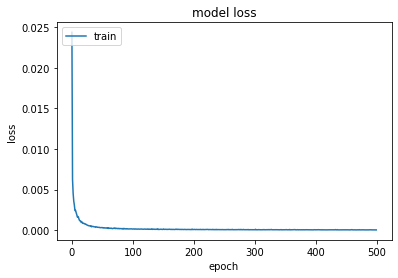

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

<class 'pandas.core.frame.DataFrame'>
(315, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

<class 'pandas.core.frame.DataFrame'>
(357, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

hand_z max is : 0.5364807407684336
hand_z min is : 0.03751754497237245
hand_x max is : 0.9532050666118402
hand_x min is : 0.7182828095117335
hand_y max is : 1.0723921154924043
hand_y min is : 0.7874838585840966
hand_z max is : 0.4491884082347085
hand_z min is : 0.046540713599843415
hand_x_max_arr is : 
[0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387

[353 rows x 16 columns]
<class 'pandas.core.frame.DataFrame'>
(353, 16)
<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.744449     0.492039       0.495656      0.031419      0.504048   
1       0.744449     0.492039       0.495656      0.031419      0.504048   
2       0.744449     0.492039       0.495656      0.031419      0.504048   
3       0.744449     0.492039       0.495656      0.031419      0.504048   
4       0.744449     0.492039       0.495656      0.031419      0.504048   
5       0.744449     0.492039       0.495656      0.031419      0.504048   
6       0.744449     0.492039       0.495656      0.031419      0.504048   
7       0.744449     0.492039       0.495656      0.031419      0.504048   
8       0.744449     0.492039       0.495656      0.031419      0.504048   
9       0.744449     0.492039       0.495656      0.031419      0.504048   
10      0.744449     0.492039       0.495656      0.03

Epoch 1/500
1605/1605 [==============================] - 24s 15ms/step - loss: 0.0231
Epoch 2/500
1605/1605 [==============================] - 18s 11ms/step - loss: 0.0055
Epoch 3/500
1605/1605 [==============================] - 18s 11ms/step - loss: 0.0043
Epoch 4/500
1605/1605 [==============================] - 18s 11ms/step - loss: 0.0030
Epoch 5/500
1605/1605 [==============================] - 18s 11ms/step - loss: 0.0027
Epoch 6/500
1605/1605 [==============================] - 18s 11ms/step - loss: 0.0024
Epoch 7/500
1605/1605 [==============================] - 18s 11ms/step - loss: 0.0021
Epoch 8/500
1605/1605 [==============================] - 18s 11ms/step - loss: 0.0019
Epoch 9/500
1605/1605 [==============================] - 18s 11ms/step - loss: 0.0018
Epoch 10/500
1605/1605 [==============================] - 18s 11ms/step - loss: 0.0015
Epoch 11/500
1605/1605 [==============================] - 18s 11ms/step - loss: 0.0014
Epoch 12/500
1605/1605 [============================

1605/1605 [==============================] - 18s 11ms/step - loss: 1.6308e-04
Epoch 92/500
1605/1605 [==============================] - 18s 11ms/step - loss: 1.8142e-04
Epoch 93/500
1605/1605 [==============================] - 18s 11ms/step - loss: 1.4800e-04
Epoch 94/500
1605/1605 [==============================] - 18s 11ms/step - loss: 1.7411e-04
Epoch 95/500
1605/1605 [==============================] - 18s 11ms/step - loss: 1.4230e-04
Epoch 96/500
1605/1605 [==============================] - 18s 11ms/step - loss: 1.3788e-04
Epoch 97/500
1605/1605 [==============================] - 18s 11ms/step - loss: 1.5232e-04
Epoch 98/500
1605/1605 [==============================] - 18s 11ms/step - loss: 1.3549e-04
Epoch 99/500
1605/1605 [==============================] - 18s 11ms/step - loss: 1.4248e-04
Epoch 100/500
1605/1605 [==============================] - 18s 11ms/step - loss: 1.3659e-04
Epoch 101/500
1605/1605 [==============================] - 18s 11ms/step - loss: 1.5795e-04
Epoch 102/

1605/1605 [==============================] - 18s 11ms/step - loss: 7.5064e-05
Epoch 181/500
1605/1605 [==============================] - 18s 11ms/step - loss: 7.4411e-05
Epoch 182/500
1605/1605 [==============================] - 18s 11ms/step - loss: 8.6625e-05
Epoch 183/500
1605/1605 [==============================] - 18s 11ms/step - loss: 7.2089e-05
Epoch 184/500
1605/1605 [==============================] - 18s 11ms/step - loss: 1.5876e-04
Epoch 185/500
1605/1605 [==============================] - 18s 11ms/step - loss: 7.6595e-05
Epoch 186/500
1605/1605 [==============================] - 18s 11ms/step - loss: 1.1652e-04
Epoch 187/500
1605/1605 [==============================] - 18s 11ms/step - loss: 7.3146e-05
Epoch 188/500
1605/1605 [==============================] - 18s 11ms/step - loss: 1.0122e-04
Epoch 189/500
1605/1605 [==============================] - 18s 11ms/step - loss: 9.7365e-05
Epoch 190/500
1605/1605 [==============================] - 18s 11ms/step - loss: 1.0768e-04
Ep

1605/1605 [==============================] - 18s 11ms/step - loss: 6.4874e-05
Epoch 270/500
1605/1605 [==============================] - 18s 11ms/step - loss: 5.5350e-05
Epoch 271/500
1605/1605 [==============================] - 18s 11ms/step - loss: 6.3488e-05
Epoch 272/500
1605/1605 [==============================] - 18s 11ms/step - loss: 5.2169e-05
Epoch 273/500
1605/1605 [==============================] - 18s 11ms/step - loss: 8.8561e-05
Epoch 274/500
1605/1605 [==============================] - 18s 11ms/step - loss: 5.1251e-05
Epoch 275/500
1605/1605 [==============================] - 18s 11ms/step - loss: 5.4143e-05
Epoch 276/500
1605/1605 [==============================] - 18s 11ms/step - loss: 5.9864e-05
Epoch 277/500
1605/1605 [==============================] - 18s 11ms/step - loss: 5.9306e-05
Epoch 278/500
1605/1605 [==============================] - 18s 11ms/step - loss: 5.7619e-05
Epoch 279/500
1605/1605 [==============================] - 18s 11ms/step - loss: 5.7283e-05
Ep

1605/1605 [==============================] - 18s 11ms/step - loss: 4.7416e-05
Epoch 359/500
1605/1605 [==============================] - 18s 11ms/step - loss: 5.8690e-05
Epoch 360/500
1605/1605 [==============================] - 18s 11ms/step - loss: 4.8836e-05
Epoch 361/500
1605/1605 [==============================] - 18s 11ms/step - loss: 4.6619e-05
Epoch 362/500
1605/1605 [==============================] - 18s 11ms/step - loss: 6.2122e-05
Epoch 363/500
1605/1605 [==============================] - 18s 11ms/step - loss: 4.4154e-05
Epoch 364/500
1605/1605 [==============================] - 18s 11ms/step - loss: 4.4802e-05
Epoch 365/500
1605/1605 [==============================] - 18s 11ms/step - loss: 4.7840e-05
Epoch 366/500
1605/1605 [==============================] - 18s 11ms/step - loss: 4.5706e-05
Epoch 367/500
1605/1605 [==============================] - 18s 11ms/step - loss: 3.7699e-05
Epoch 368/500
1605/1605 [==============================] - 18s 11ms/step - loss: 5.2359e-05
Ep

1605/1605 [==============================] - 18s 11ms/step - loss: 6.7120e-05
Epoch 448/500
1605/1605 [==============================] - 18s 11ms/step - loss: 4.6318e-05
Epoch 449/500
1605/1605 [==============================] - 18s 11ms/step - loss: 4.1307e-05
Epoch 450/500
1605/1605 [==============================] - 18s 11ms/step - loss: 3.2434e-05
Epoch 451/500
1605/1605 [==============================] - 18s 11ms/step - loss: 4.4376e-05
Epoch 452/500
1605/1605 [==============================] - 18s 11ms/step - loss: 4.1088e-05
Epoch 453/500
1605/1605 [==============================] - 18s 11ms/step - loss: 5.1983e-05
Epoch 454/500
1605/1605 [==============================] - 18s 11ms/step - loss: 3.5016e-05
Epoch 455/500
1605/1605 [==============================] - 18s 11ms/step - loss: 4.7161e-05
Epoch 456/500
1605/1605 [==============================] - 18s 11ms/step - loss: 4.2891e-05
Epoch 457/500
1605/1605 [==============================] - 18s 11ms/step - loss: 3.5606e-05
Ep

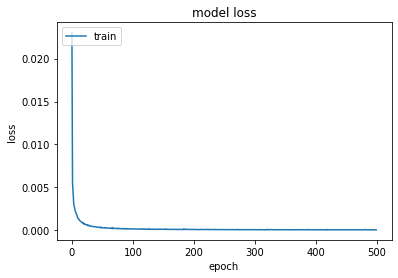

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

<class 'pandas.core.frame.DataFrame'>
(375, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
2    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
3    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
4    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
5    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
6    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
7    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
8    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
9    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
10   0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
11   0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
12   0.749999  0

<class 'pandas.core.frame.DataFrame'>
(373, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
1    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
2    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
3    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
4    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
5    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
6    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
7    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
8    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
9    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
10   0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
11   0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
12   0.749999  0

hand_x max is : 0.9548262497780282
hand_x min is : 0.6878815783593673
hand_y max is : 1.072390007877012
hand_y min is : 0.7731470312757966
hand_z max is : 0.4178323147900985
hand_z min is : 0.05963962946003624
hand_x max is : 0.9521031040579809
hand_x min is : 0.7064161667824996
hand_y max is : 1.072392115489022
hand_y min is : 0.7810518983925026
hand_z max is : 0.3348836197284272
hand_z min is : 0.04366723176483128
hand_x max is : 0.9529008801190858
hand_x min is : 0.6717803631085324
hand_y max is : 1.0723921154923597
hand_y min is : 0.7704245915707718
hand_z max is : 0.4256143977285175
hand_z min is : 0.06687830778544702
hand_x max is : 0.9543508660329038
hand_x min is : 0.7421045083853685
hand_y max is : 1.0723921155088898
hand_y min is : 0.7792901679254952
hand_z max is : 0.4099229762423224
hand_z min is : 0.05698730421795072
hand_x max is : 0.9526803792387778
hand_x min is : 0.5859430597247628
hand_y max is : 1.0723921154893272
hand_y min is : 0.7436435363136658
hand_z max is : 0.

<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.743548     0.493127       0.494005      0.031840      0.505729   
1       0.743548     0.493127       0.494005      0.031840      0.505729   
2       0.743548     0.493127       0.494005      0.031840      0.505729   
3       0.743548     0.493127       0.494005      0.031840      0.505729   
4       0.743548     0.493127       0.494005      0.031840      0.505729   
5       0.743548     0.493127       0.494005      0.031840      0.505729   
6       0.743548     0.493127       0.494005      0.031840      0.505729   
7       0.743548     0.493127       0.494005      0.031840      0.505729   
8       0.743548     0.493127       0.494005      0.031840      0.505729   
9       0.743548     0.493127       0.494005      0.031840      0.505729   
10      0.743548     0.493127       0.494005      0.031840      0.505729   
11      0.743548     0.493127       0.494005      

(1665, 90, 21)
(1665, 16)
Epoch 1/500
1665/1665 [==============================] - 28s 17ms/step - loss: 0.0210
Epoch 2/500
1665/1665 [==============================] - 21s 12ms/step - loss: 0.0050
Epoch 3/500
1665/1665 [==============================] - 21s 13ms/step - loss: 0.0042
Epoch 4/500
1665/1665 [==============================] - 21s 12ms/step - loss: 0.0032
Epoch 5/500
1665/1665 [==============================] - 21s 12ms/step - loss: 0.0028
Epoch 6/500
1665/1665 [==============================] - 21s 12ms/step - loss: 0.0025
Epoch 7/500
1665/1665 [==============================] - 20s 12ms/step - loss: 0.0022
Epoch 8/500
1665/1665 [==============================] - 21s 12ms/step - loss: 0.0021
Epoch 9/500
1665/1665 [==============================] - 21s 12ms/step - loss: 0.0017
Epoch 10/500
1665/1665 [==============================] - 21s 12ms/step - loss: 0.0017
Epoch 11/500
1665/1665 [==============================] - 21s 12ms/step - loss: 0.0015
Epoch 12/500
1665/1665 [==

1665/1665 [==============================] - 21s 12ms/step - loss: 1.7893e-04
Epoch 92/500
1665/1665 [==============================] - 20s 12ms/step - loss: 1.9434e-04
Epoch 93/500
1665/1665 [==============================] - 21s 12ms/step - loss: 1.7111e-04
Epoch 94/500
1665/1665 [==============================] - 20s 12ms/step - loss: 2.1446e-04
Epoch 95/500
1665/1665 [==============================] - 21s 12ms/step - loss: 1.5647e-04
Epoch 96/500
1665/1665 [==============================] - 21s 12ms/step - loss: 1.7919e-04
Epoch 97/500
1665/1665 [==============================] - 21s 12ms/step - loss: 1.9997e-04
Epoch 98/500
1665/1665 [==============================] - 20s 12ms/step - loss: 1.4873e-04
Epoch 99/500
1665/1665 [==============================] - 21s 12ms/step - loss: 1.5178e-04
Epoch 100/500
1665/1665 [==============================] - 21s 12ms/step - loss: 1.8068e-04
Epoch 101/500
1665/1665 [==============================] - 21s 12ms/step - loss: 1.5209e-04
Epoch 102/

1665/1665 [==============================] - 21s 12ms/step - loss: 9.9246e-05
Epoch 181/500
1665/1665 [==============================] - 20s 12ms/step - loss: 1.0257e-04
Epoch 182/500
1665/1665 [==============================] - 21s 12ms/step - loss: 8.7263e-05
Epoch 183/500
1665/1665 [==============================] - 21s 12ms/step - loss: 9.4664e-05
Epoch 184/500
1665/1665 [==============================] - 21s 12ms/step - loss: 9.3416e-05
Epoch 185/500
1665/1665 [==============================] - 21s 12ms/step - loss: 9.1519e-05
Epoch 186/500
1665/1665 [==============================] - 21s 12ms/step - loss: 9.2271e-05
Epoch 187/500
1665/1665 [==============================] - 21s 12ms/step - loss: 1.0394e-04
Epoch 188/500
1665/1665 [==============================] - 21s 12ms/step - loss: 1.0359e-04
Epoch 189/500
1665/1665 [==============================] - 21s 12ms/step - loss: 1.0650e-04
Epoch 190/500
1665/1665 [==============================] - 21s 12ms/step - loss: 8.8929e-05
Ep

1665/1665 [==============================] - 21s 12ms/step - loss: 6.6739e-05
Epoch 270/500
1665/1665 [==============================] - 21s 12ms/step - loss: 6.6216e-05
Epoch 271/500
1665/1665 [==============================] - 21s 12ms/step - loss: 6.5546e-05
Epoch 272/500
1665/1665 [==============================] - 21s 12ms/step - loss: 6.9459e-05
Epoch 273/500
1665/1665 [==============================] - 21s 12ms/step - loss: 6.3187e-05
Epoch 274/500
1665/1665 [==============================] - 21s 12ms/step - loss: 6.9834e-05
Epoch 275/500
1665/1665 [==============================] - 21s 12ms/step - loss: 5.6950e-05
Epoch 276/500
1665/1665 [==============================] - 21s 12ms/step - loss: 6.6137e-05
Epoch 277/500
1665/1665 [==============================] - 21s 12ms/step - loss: 8.2438e-05
Epoch 278/500
1665/1665 [==============================] - 21s 12ms/step - loss: 5.8727e-05
Epoch 279/500
1665/1665 [==============================] - 21s 12ms/step - loss: 6.4280e-05
Ep

1665/1665 [==============================] - 21s 12ms/step - loss: 7.6640e-05
Epoch 359/500
1665/1665 [==============================] - 21s 12ms/step - loss: 4.5215e-05
Epoch 360/500
1665/1665 [==============================] - 21s 12ms/step - loss: 5.8387e-05
Epoch 361/500
1665/1665 [==============================] - 21s 12ms/step - loss: 4.8575e-05
Epoch 362/500
1665/1665 [==============================] - 21s 12ms/step - loss: 5.0481e-05
Epoch 363/500
1665/1665 [==============================] - 21s 12ms/step - loss: 5.0147e-05
Epoch 364/500
1665/1665 [==============================] - 21s 12ms/step - loss: 6.0444e-05
Epoch 365/500
1665/1665 [==============================] - 21s 12ms/step - loss: 5.5501e-05
Epoch 366/500
1665/1665 [==============================] - 21s 12ms/step - loss: 4.2642e-05
Epoch 367/500
1665/1665 [==============================] - 20s 12ms/step - loss: 5.7171e-05
Epoch 368/500
1665/1665 [==============================] - 21s 12ms/step - loss: 5.0979e-05
Ep

1665/1665 [==============================] - 21s 12ms/step - loss: 4.4814e-05
Epoch 448/500
1665/1665 [==============================] - 21s 12ms/step - loss: 4.6912e-05
Epoch 449/500
1665/1665 [==============================] - 21s 12ms/step - loss: 3.8983e-05
Epoch 450/500
1665/1665 [==============================] - 21s 12ms/step - loss: 3.7519e-05
Epoch 451/500
1665/1665 [==============================] - 21s 13ms/step - loss: 4.6748e-05
Epoch 452/500
1665/1665 [==============================] - 21s 12ms/step - loss: 3.4106e-05
Epoch 453/500
1665/1665 [==============================] - 21s 12ms/step - loss: 3.7388e-05
Epoch 454/500
1665/1665 [==============================] - 21s 12ms/step - loss: 3.5461e-05
Epoch 455/500
1665/1665 [==============================] - 21s 12ms/step - loss: 5.9587e-05
Epoch 456/500
1665/1665 [==============================] - 21s 12ms/step - loss: 3.3453e-05
Epoch 457/500
1665/1665 [==============================] - 21s 12ms/step - loss: 3.8535e-05
Ep

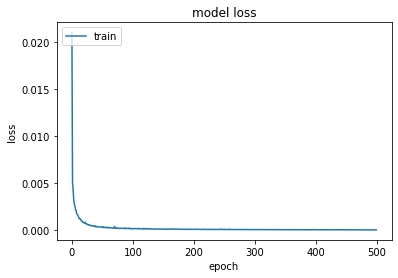

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

<class 'pandas.core.frame.DataFrame'>
(395, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
2    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
3    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
4    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
5    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
6    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
7    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
8    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
9    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
10   0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
11   0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
12   0.749999  0

[395 rows x 38 columns]
<class 'pandas.core.frame.DataFrame'>
(393, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
1    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
2    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
3    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
4    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
5    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
6    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
7    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
8    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
9    0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
10   0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.500009   
11   0.749999  0.499999    0.50000 -7.360130e-07   0.50000  0.50

<class 'pandas.core.frame.DataFrame'>
(384, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.743548     0.493127       0.494005      0.031840      0.505729   
1       0.743548     0.493127       0.494005      0.031840      0.505729   
2       0.743548     0.493127       0.494005      0.031840      0.505729   
3       0.743548     0.493127       0.494005      0.031840      0.505729   
4       0.743548     0.493127       0.494005      0.031840      0.505729   
5       0.743548     0.493127       0.494005      0.031840      0.505729   
6       0.743548     0.493127       0.494005      0.031840      0.505729   
7       0.743548     0.493127       0.494005      0.031840      0.505729   
8       0.743548     0.493127       0.494005      0.031840      0.505729   
9       0.743548     0.493127       0.494005      0.031840      0.505729   
10      0.743548     0.493127       0.494005      0.031840      0.505729   
11      0.743548     0.493127       0.494005      

(1725, 100, 21)
(1725, 16)
Epoch 1/500
1725/1725 [==============================] - 31s 18ms/step - loss: 0.0212
Epoch 2/500
1725/1725 [==============================] - 23s 13ms/step - loss: 0.0056
Epoch 3/500
1725/1725 [==============================] - 23s 13ms/step - loss: 0.0042
Epoch 4/500
1725/1725 [==============================] - 23s 13ms/step - loss: 0.0032
Epoch 5/500
1725/1725 [==============================] - 23s 13ms/step - loss: 0.0027
Epoch 6/500
1725/1725 [==============================] - 23s 13ms/step - loss: 0.0024
Epoch 7/500
1725/1725 [==============================] - 23s 13ms/step - loss: 0.0019
Epoch 8/500
1725/1725 [==============================] - 23s 13ms/step - loss: 0.0018
Epoch 9/500
1725/1725 [==============================] - 23s 13ms/step - loss: 0.0017
Epoch 10/500
1725/1725 [==============================] - 23s 13ms/step - loss: 0.0014
Epoch 11/500
1725/1725 [==============================] - 23s 13ms/step - loss: 0.0014
Epoch 12/500
1725/1725 [=

1725/1725 [==============================] - 23s 14ms/step - loss: 1.5725e-04
Epoch 92/500
1725/1725 [==============================] - 23s 13ms/step - loss: 1.2796e-04
Epoch 93/500
1725/1725 [==============================] - 23s 13ms/step - loss: 1.8143e-04
Epoch 94/500
1725/1725 [==============================] - 23s 13ms/step - loss: 1.2907e-04
Epoch 95/500
1725/1725 [==============================] - 23s 13ms/step - loss: 1.4215e-04
Epoch 96/500
1725/1725 [==============================] - 23s 13ms/step - loss: 1.2327e-04
Epoch 97/500
1725/1725 [==============================] - 23s 14ms/step - loss: 1.2854e-04
Epoch 98/500
1725/1725 [==============================] - 23s 13ms/step - loss: 1.3871e-04
Epoch 99/500
1725/1725 [==============================] - 23s 13ms/step - loss: 1.4923e-04
Epoch 100/500
1725/1725 [==============================] - 23s 13ms/step - loss: 1.8283e-04
Epoch 101/500
1725/1725 [==============================] - 23s 13ms/step - loss: 1.7445e-04
Epoch 102/

1725/1725 [==============================] - 23s 13ms/step - loss: 7.4322e-05
Epoch 181/500
1725/1725 [==============================] - 23s 13ms/step - loss: 7.5302e-05
Epoch 182/500
1725/1725 [==============================] - 23s 13ms/step - loss: 9.5482e-05
Epoch 183/500
1725/1725 [==============================] - 23s 13ms/step - loss: 7.3883e-05
Epoch 184/500
1725/1725 [==============================] - 23s 13ms/step - loss: 7.5834e-05
Epoch 185/500
1725/1725 [==============================] - 23s 13ms/step - loss: 8.2241e-05
Epoch 186/500
1725/1725 [==============================] - 23s 13ms/step - loss: 1.1208e-04
Epoch 187/500
1725/1725 [==============================] - 23s 13ms/step - loss: 6.8677e-05
Epoch 188/500
1725/1725 [==============================] - 23s 13ms/step - loss: 7.0799e-05
Epoch 189/500
1725/1725 [==============================] - 23s 13ms/step - loss: 8.5899e-05
Epoch 190/500
1725/1725 [==============================] - 23s 13ms/step - loss: 8.3653e-05
Ep

1725/1725 [==============================] - 24s 14ms/step - loss: 5.0774e-05
Epoch 270/500
1725/1725 [==============================] - 24s 14ms/step - loss: 6.0494e-05
Epoch 271/500
1725/1725 [==============================] - 24s 14ms/step - loss: 5.1953e-05
Epoch 272/500
1725/1725 [==============================] - 24s 14ms/step - loss: 8.0360e-05
Epoch 273/500
1725/1725 [==============================] - 24s 14ms/step - loss: 5.4503e-05
Epoch 274/500
1725/1725 [==============================] - 24s 14ms/step - loss: 5.6544e-05
Epoch 275/500
1725/1725 [==============================] - 24s 14ms/step - loss: 5.5869e-05
Epoch 276/500
1725/1725 [==============================] - 24s 14ms/step - loss: 5.7311e-05
Epoch 277/500
1725/1725 [==============================] - 25s 14ms/step - loss: 5.6497e-05
Epoch 278/500
1725/1725 [==============================] - 24s 14ms/step - loss: 5.7828e-05
Epoch 279/500
1725/1725 [==============================] - 24s 14ms/step - loss: 5.5875e-05
Ep

1725/1725 [==============================] - 24s 14ms/step - loss: 4.9502e-05
Epoch 359/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.8954e-05
Epoch 360/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.7626e-05
Epoch 361/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.8485e-05
Epoch 362/500
1725/1725 [==============================] - 24s 14ms/step - loss: 3.8755e-05
Epoch 363/500
1725/1725 [==============================] - 24s 14ms/step - loss: 5.3338e-05
Epoch 364/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.3169e-05
Epoch 365/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.7981e-05
Epoch 366/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.7559e-05
Epoch 367/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.5913e-05
Epoch 368/500
1725/1725 [==============================] - 23s 14ms/step - loss: 5.5800e-05
Ep

1725/1725 [==============================] - 24s 14ms/step - loss: 4.3178e-05
Epoch 448/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.8298e-05
Epoch 449/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.9879e-05
Epoch 450/500
1725/1725 [==============================] - 24s 14ms/step - loss: 3.9442e-05
Epoch 451/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.0634e-05
Epoch 452/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.0611e-05
Epoch 453/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.0847e-05
Epoch 454/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.1623e-05
Epoch 455/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.0119e-05
Epoch 456/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.1697e-05
Epoch 457/500
1725/1725 [==============================] - 24s 14ms/step - loss: 4.2528e-05
Ep

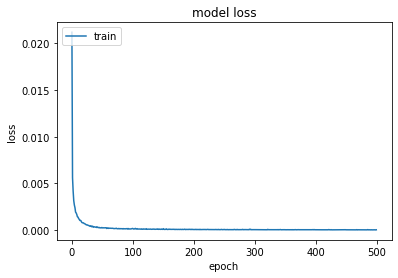

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

<class 'pandas.core.frame.DataFrame'>
(415, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
2    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
3    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
4    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
5    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
6    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
7    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
8    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
9    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
10   0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
11   0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
12   0.749999  0

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.50

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.50

hand_y max is : 1.0723921155088898
hand_y min is : 0.7792901679254952
hand_z max is : 0.4099229762423224
hand_z min is : 0.05698730421795072
hand_x max is : 0.9526803792387778
hand_x min is : 0.5859430597247628
hand_y max is : 1.0723921154893272
hand_y min is : 0.7436435363136658
hand_z max is : 0.5364807407684336
hand_z min is : 0.03751754497237245
hand_x max is : 0.9532050666118402
hand_x min is : 0.7182828095117335
hand_y max is : 1.0723921154924043
hand_y min is : 0.7874838585840966
hand_z max is : 0.4491884082347085
hand_z min is : 0.046540713599843415
hand_x_max_arr is : 
[0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.952900880119

[415 rows x 16 columns]
<class 'pandas.core.frame.DataFrame'>
(415, 16)
<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.743188     0.498898       0.497298      0.020865       0.50605   
1       0.743188     0.498898       0.497298      0.020865       0.50605   
2       0.743188     0.498898       0.497298      0.020865       0.50605   
3       0.743188     0.498898       0.497298      0.020865       0.50605   
4       0.743188     0.498898       0.497298      0.020865       0.50605   
5       0.743188     0.498898       0.497298      0.020865       0.50605   
6       0.743188     0.498898       0.497298      0.020865       0.50605   
7       0.743188     0.498898       0.497298      0.020865       0.50605   
8       0.743188     0.498898       0.497298      0.020865       0.50605   
9       0.743188     0.498898       0.497298      0.020865       0.50605   
10      0.743188     0.498898       0.497298      0.02

(1785, 110, 21)
(1785, 16)
Epoch 1/500
1785/1785 [==============================] - 35s 20ms/step - loss: 0.0212
Epoch 2/500
1785/1785 [==============================] - 27s 15ms/step - loss: 0.0050
Epoch 3/500
1785/1785 [==============================] - 31s 18ms/step - loss: 0.0037
Epoch 4/500
1785/1785 [==============================] - 36s 20ms/step - loss: 0.0031
Epoch 5/500
1785/1785 [==============================] - 29s 16ms/step - loss: 0.0024
Epoch 6/500
1785/1785 [==============================] - 27s 15ms/step - loss: 0.0021
Epoch 7/500
1785/1785 [==============================] - 27s 15ms/step - loss: 0.0017
Epoch 8/500
1785/1785 [==============================] - 27s 15ms/step - loss: 0.0017
Epoch 9/500
1785/1785 [==============================] - 27s 15ms/step - loss: 0.0014
Epoch 10/500
1785/1785 [==============================] - 27s 15ms/step - loss: 0.0013
Epoch 11/500
1785/1785 [==============================] - 27s 15ms/step - loss: 0.0012
Epoch 12/500
1785/1785 [=

1785/1785 [==============================] - 27s 15ms/step - loss: 1.1286e-04
Epoch 92/500
1785/1785 [==============================] - 27s 15ms/step - loss: 1.0882e-04
Epoch 93/500
1785/1785 [==============================] - 27s 15ms/step - loss: 1.5184e-04
Epoch 94/500
1785/1785 [==============================] - 27s 15ms/step - loss: 1.0926e-04
Epoch 95/500
1785/1785 [==============================] - 27s 15ms/step - loss: 1.2020e-04
Epoch 96/500
1785/1785 [==============================] - 27s 15ms/step - loss: 1.5022e-04
Epoch 97/500
1785/1785 [==============================] - 27s 15ms/step - loss: 1.2439e-04
Epoch 98/500
1785/1785 [==============================] - 27s 15ms/step - loss: 1.4067e-04
Epoch 99/500
1785/1785 [==============================] - 27s 15ms/step - loss: 1.1330e-04
Epoch 100/500
1785/1785 [==============================] - 27s 15ms/step - loss: 1.1227e-04
Epoch 101/500
1785/1785 [==============================] - 27s 15ms/step - loss: 1.4391e-04
Epoch 102/

1785/1785 [==============================] - 27s 15ms/step - loss: 7.3582e-05
Epoch 181/500
1785/1785 [==============================] - 27s 15ms/step - loss: 6.7190e-05
Epoch 182/500
1785/1785 [==============================] - 27s 15ms/step - loss: 6.6274e-05
Epoch 183/500
1785/1785 [==============================] - 27s 15ms/step - loss: 8.5935e-05
Epoch 184/500
1785/1785 [==============================] - 27s 15ms/step - loss: 8.9209e-05
Epoch 185/500
1785/1785 [==============================] - 27s 15ms/step - loss: 6.5085e-05
Epoch 186/500
1785/1785 [==============================] - 27s 15ms/step - loss: 7.0057e-05
Epoch 187/500
1785/1785 [==============================] - 27s 15ms/step - loss: 1.0285e-04
Epoch 188/500
1785/1785 [==============================] - 27s 15ms/step - loss: 6.4649e-05
Epoch 189/500
1785/1785 [==============================] - 27s 15ms/step - loss: 6.6508e-05
Epoch 190/500
1785/1785 [==============================] - 27s 15ms/step - loss: 6.8055e-05
Ep

1785/1785 [==============================] - 26s 14ms/step - loss: 9.3510e-05
Epoch 270/500
1785/1785 [==============================] - 26s 14ms/step - loss: 5.5073e-05
Epoch 271/500
1785/1785 [==============================] - 26s 15ms/step - loss: 5.7436e-05
Epoch 272/500
1785/1785 [==============================] - 26s 15ms/step - loss: 5.6555e-05
Epoch 273/500
1785/1785 [==============================] - 26s 14ms/step - loss: 5.5574e-05
Epoch 274/500
1785/1785 [==============================] - 26s 14ms/step - loss: 5.4895e-05
Epoch 275/500
1785/1785 [==============================] - 26s 14ms/step - loss: 5.3079e-05
Epoch 276/500
1785/1785 [==============================] - 26s 15ms/step - loss: 5.1275e-05
Epoch 277/500
1785/1785 [==============================] - 26s 15ms/step - loss: 5.6992e-05
Epoch 278/500
1785/1785 [==============================] - 26s 14ms/step - loss: 5.9387e-05
Epoch 279/500
1785/1785 [==============================] - 26s 14ms/step - loss: 4.8782e-05
Ep

1785/1785 [==============================] - 26s 14ms/step - loss: 4.3299e-05
Epoch 359/500
1785/1785 [==============================] - 26s 14ms/step - loss: 5.4516e-05
Epoch 360/500
1785/1785 [==============================] - 26s 15ms/step - loss: 4.9932e-05
Epoch 361/500
1785/1785 [==============================] - 26s 14ms/step - loss: 4.4461e-05
Epoch 362/500
1785/1785 [==============================] - 26s 15ms/step - loss: 4.6198e-05
Epoch 363/500
1785/1785 [==============================] - 26s 14ms/step - loss: 4.2984e-05
Epoch 364/500
1785/1785 [==============================] - 26s 15ms/step - loss: 4.4279e-05
Epoch 365/500
1785/1785 [==============================] - 26s 15ms/step - loss: 4.7162e-05
Epoch 366/500
1785/1785 [==============================] - 26s 14ms/step - loss: 3.9428e-05
Epoch 367/500
1785/1785 [==============================] - 26s 14ms/step - loss: 4.8661e-05
Epoch 368/500
1785/1785 [==============================] - 26s 14ms/step - loss: 4.3371e-05
Ep

1785/1785 [==============================] - 26s 14ms/step - loss: 4.2310e-05
Epoch 448/500
1785/1785 [==============================] - 26s 15ms/step - loss: 3.7984e-05
Epoch 449/500
1785/1785 [==============================] - 26s 14ms/step - loss: 4.0246e-05
Epoch 450/500
1785/1785 [==============================] - 26s 14ms/step - loss: 3.9974e-05
Epoch 451/500
1785/1785 [==============================] - 26s 14ms/step - loss: 4.1155e-05
Epoch 452/500
1785/1785 [==============================] - 26s 14ms/step - loss: 3.6523e-05
Epoch 453/500
1785/1785 [==============================] - 26s 15ms/step - loss: 4.3096e-05
Epoch 454/500
1785/1785 [==============================] - 26s 14ms/step - loss: 3.7796e-05
Epoch 455/500
1785/1785 [==============================] - 26s 14ms/step - loss: 4.4963e-05
Epoch 456/500
1785/1785 [==============================] - 26s 14ms/step - loss: 3.6256e-05
Epoch 457/500
1785/1785 [==============================] - 26s 14ms/step - loss: 3.6648e-05
Ep

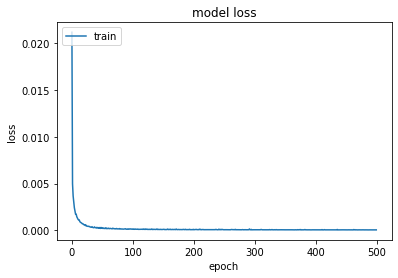

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

<class 'pandas.core.frame.DataFrame'>
(435, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
2    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
3    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
4    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
5    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
6    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
7    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
8    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
9    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
10   0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
11   0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
12   0.749999  0

<class 'pandas.core.frame.DataFrame'>
(435, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

<class 'pandas.core.frame.DataFrame'>
(437, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

hand_y max is : 1.0723921154923597
hand_y min is : 0.7704245915707718
hand_z max is : 0.4256143977285175
hand_z min is : 0.06687830778544702
hand_x max is : 0.9543508660329038
hand_x min is : 0.7421045083853685
hand_y max is : 1.0723921155088898
hand_y min is : 0.7792901679254952
hand_z max is : 0.4099229762423224
hand_z min is : 0.05698730421795072
hand_x max is : 0.9526803792387778
hand_x min is : 0.5859430597247628
hand_y max is : 1.0723921154893272
hand_y min is : 0.7436435363136658
hand_z max is : 0.5364807407684336
hand_z min is : 0.03751754497237245
hand_x max is : 0.9532050666118402
hand_x min is : 0.7182828095117335
hand_y max is : 1.0723921154924043
hand_y min is : 0.7874838585840966
hand_z max is : 0.4491884082347085
hand_z min is : 0.046540713599843415
hand_x_max_arr is : 
[0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9526803792387778, 0.9532050666118402, 0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.9543508660329038, 0.9

<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.743548     0.493127       0.494005      0.031840      0.505729   
1       0.743548     0.493127       0.494005      0.031840      0.505729   
2       0.743548     0.493127       0.494005      0.031840      0.505729   
3       0.743548     0.493127       0.494005      0.031840      0.505729   
4       0.743548     0.493127       0.494005      0.031840      0.505729   
5       0.743548     0.493127       0.494005      0.031840      0.505729   
6       0.743548     0.493127       0.494005      0.031840      0.505729   
7       0.743548     0.493127       0.494005      0.031840      0.505729   
8       0.743548     0.493127       0.494005      0.031840      0.505729   
9       0.743548     0.493127       0.494005      0.031840      0.505729   
10      0.743548     0.493127       0.494005      0.031840      0.505729   
11      0.743548     0.493127       0.494005      

     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.742037     0.497058       0.502353      0.031843      0.507962   
1       0.742037     0.497058       0.502353      0.031843      0.507962   
2       0.742037     0.497058       0.502353      0.031843      0.507962   
3       0.742037     0.497058       0.502353      0.031843      0.507962   
4       0.742037     0.497058       0.502353      0.031843      0.507962   
5       0.742037     0.497058       0.502353      0.031843      0.507962   
6       0.742037     0.497058       0.502353      0.031843      0.507962   
7       0.742037     0.497058       0.502353      0.031843      0.507962   
8       0.742037     0.497058       0.502353      0.031843      0.507962   
9       0.742037     0.497058       0.502353      0.031843      0.507962   
10      0.742037     0.497058       0.502353      0.031843      0.507962   
11      0.742037     0.497058       0.502353      0.031843      0.507962   
12      0.74

Epoch 1/500
1845/1845 [==============================] - 39s 21ms/step - loss: 0.0257
Epoch 2/500
1845/1845 [==============================] - 29s 16ms/step - loss: 0.0060
Epoch 3/500
1845/1845 [==============================] - 29s 16ms/step - loss: 0.0044
Epoch 4/500
1845/1845 [==============================] - 29s 16ms/step - loss: 0.0034
Epoch 5/500
1845/1845 [==============================] - 29s 16ms/step - loss: 0.0026
Epoch 6/500
1845/1845 [==============================] - 29s 16ms/step - loss: 0.0025
Epoch 7/500
1845/1845 [==============================] - 29s 16ms/step - loss: 0.0020
Epoch 8/500
1845/1845 [==============================] - 29s 16ms/step - loss: 0.0018
Epoch 9/500
1845/1845 [==============================] - 29s 16ms/step - loss: 0.0016
Epoch 10/500
1845/1845 [==============================] - 29s 16ms/step - loss: 0.0015
Epoch 11/500
1845/1845 [==============================] - 29s 16ms/step - loss: 0.0013
Epoch 12/500
1845/1845 [============================

1845/1845 [==============================] - 29s 16ms/step - loss: 1.8489e-04
Epoch 92/500
1845/1845 [==============================] - 29s 16ms/step - loss: 1.2748e-04
Epoch 93/500
1845/1845 [==============================] - 29s 16ms/step - loss: 1.3300e-04
Epoch 94/500
1845/1845 [==============================] - 29s 16ms/step - loss: 1.7707e-04
Epoch 95/500
1845/1845 [==============================] - 29s 16ms/step - loss: 1.2950e-04
Epoch 96/500
1845/1845 [==============================] - 29s 16ms/step - loss: 1.6217e-04
Epoch 97/500
1845/1845 [==============================] - 29s 16ms/step - loss: 1.2577e-04
Epoch 98/500
1845/1845 [==============================] - 29s 16ms/step - loss: 1.7640e-04
Epoch 99/500
1845/1845 [==============================] - 29s 16ms/step - loss: 1.1375e-04
Epoch 100/500
1845/1845 [==============================] - 29s 16ms/step - loss: 1.3490e-04
Epoch 101/500
1845/1845 [==============================] - 29s 16ms/step - loss: 1.7461e-04
Epoch 102/

1845/1845 [==============================] - 29s 16ms/step - loss: 7.4577e-05
Epoch 181/500
1845/1845 [==============================] - 29s 16ms/step - loss: 8.2231e-05
Epoch 182/500
1845/1845 [==============================] - 29s 16ms/step - loss: 7.7925e-05
Epoch 183/500
1845/1845 [==============================] - 29s 16ms/step - loss: 7.7333e-05
Epoch 184/500
1845/1845 [==============================] - 29s 16ms/step - loss: 1.1609e-04
Epoch 185/500
1845/1845 [==============================] - 29s 16ms/step - loss: 7.4960e-05
Epoch 186/500
1845/1845 [==============================] - 29s 16ms/step - loss: 1.1361e-04
Epoch 187/500
1845/1845 [==============================] - 30s 16ms/step - loss: 7.1033e-05
Epoch 188/500
1845/1845 [==============================] - 29s 16ms/step - loss: 1.0252e-04
Epoch 189/500
1845/1845 [==============================] - 29s 16ms/step - loss: 9.0953e-05
Epoch 190/500
1845/1845 [==============================] - 29s 16ms/step - loss: 7.9559e-05
Ep

1845/1845 [==============================] - 29s 16ms/step - loss: 5.9365e-05
Epoch 270/500
1845/1845 [==============================] - 29s 16ms/step - loss: 6.2975e-05
Epoch 271/500
1845/1845 [==============================] - 29s 16ms/step - loss: 6.1514e-05
Epoch 272/500
1845/1845 [==============================] - 29s 16ms/step - loss: 5.7804e-05
Epoch 273/500
1845/1845 [==============================] - 29s 16ms/step - loss: 6.7921e-05
Epoch 274/500
1845/1845 [==============================] - 29s 16ms/step - loss: 6.2188e-05
Epoch 275/500
1845/1845 [==============================] - 29s 16ms/step - loss: 5.9370e-05
Epoch 276/500
1845/1845 [==============================] - 29s 16ms/step - loss: 9.6408e-05
Epoch 277/500
1845/1845 [==============================] - 29s 16ms/step - loss: 4.6913e-05
Epoch 278/500
1845/1845 [==============================] - 29s 16ms/step - loss: 5.7546e-05
Epoch 279/500
1845/1845 [==============================] - 29s 16ms/step - loss: 5.7988e-05
Ep

1845/1845 [==============================] - 29s 16ms/step - loss: 4.9447e-05
Epoch 359/500
1845/1845 [==============================] - 29s 16ms/step - loss: 6.8853e-05
Epoch 360/500
1845/1845 [==============================] - 29s 16ms/step - loss: 5.0297e-05
Epoch 361/500
1845/1845 [==============================] - 29s 16ms/step - loss: 9.2700e-05
Epoch 362/500
1845/1845 [==============================] - 29s 16ms/step - loss: 4.9312e-05
Epoch 363/500
1845/1845 [==============================] - 29s 16ms/step - loss: 6.4705e-05
Epoch 364/500
1845/1845 [==============================] - 29s 16ms/step - loss: 4.4309e-05
Epoch 365/500
1845/1845 [==============================] - 29s 16ms/step - loss: 5.7199e-05
Epoch 366/500
1845/1845 [==============================] - 29s 16ms/step - loss: 4.9807e-05
Epoch 367/500
1845/1845 [==============================] - 29s 16ms/step - loss: 4.9229e-05
Epoch 368/500
1845/1845 [==============================] - 29s 16ms/step - loss: 4.9424e-05
Ep

1845/1845 [==============================] - 29s 16ms/step - loss: 4.7889e-05
Epoch 448/500
1845/1845 [==============================] - 29s 16ms/step - loss: 4.0573e-05
Epoch 449/500
1845/1845 [==============================] - 29s 16ms/step - loss: 4.3658e-05
Epoch 450/500
1845/1845 [==============================] - 29s 16ms/step - loss: 4.6883e-05
Epoch 451/500
1845/1845 [==============================] - 29s 16ms/step - loss: 4.1868e-05
Epoch 452/500
1845/1845 [==============================] - 29s 16ms/step - loss: 4.6673e-05
Epoch 453/500
1845/1845 [==============================] - 29s 16ms/step - loss: 5.6898e-05
Epoch 454/500
1845/1845 [==============================] - 29s 16ms/step - loss: 4.4106e-05
Epoch 455/500
1845/1845 [==============================] - 29s 16ms/step - loss: 4.4095e-05
Epoch 456/500
1845/1845 [==============================] - 29s 16ms/step - loss: 4.4581e-05
Epoch 457/500
1845/1845 [==============================] - 29s 16ms/step - loss: 4.7043e-05
Ep

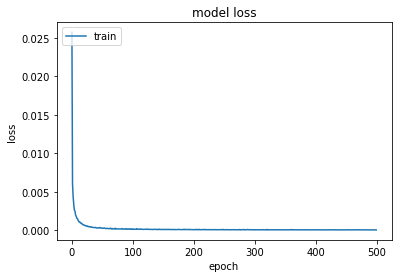

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

<class 'pandas.core.frame.DataFrame'>
(455, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
2    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
3    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
4    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
5    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
6    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
7    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
8    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
9    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
10   0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
11   0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
12   0.749999  0

<class 'pandas.core.frame.DataFrame'>
(455, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

<class 'pandas.core.frame.DataFrame'>
(457, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

hand_z max is : 0.3348836197284272
hand_z min is : 0.04366723176483128
hand_x max is : 0.9529008801190858
hand_x min is : 0.6717803631085324
hand_y max is : 1.0723921154923597
hand_y min is : 0.7704245915707718
hand_z max is : 0.4256143977285175
hand_z min is : 0.06687830778544702
hand_x max is : 0.9543508660329038
hand_x min is : 0.7421045083853685
hand_y max is : 1.0723921155088898
hand_y min is : 0.7792901679254952
hand_z max is : 0.4099229762423224
hand_z min is : 0.05698730421795072
hand_x max is : 0.9526803792387778
hand_x min is : 0.5859430597247628
hand_y max is : 1.0723921154893272
hand_y min is : 0.7436435363136658
hand_z max is : 0.5364807407684336
hand_z min is : 0.03751754497237245
hand_x max is : 0.9532050666118402
hand_x min is : 0.7182828095117335
hand_y max is : 1.0723921154924043
hand_y min is : 0.7874838585840966
hand_z max is : 0.4491884082347085
hand_z min is : 0.046540713599843415
hand_x_max_arr is : 
[0.9548262497780282, 0.9521031040579809, 0.9529008801190858, 0.

<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.743548     0.493127       0.494005      0.031840      0.505729   
1       0.743548     0.493127       0.494005      0.031840      0.505729   
2       0.743548     0.493127       0.494005      0.031840      0.505729   
3       0.743548     0.493127       0.494005      0.031840      0.505729   
4       0.743548     0.493127       0.494005      0.031840      0.505729   
5       0.743548     0.493127       0.494005      0.031840      0.505729   
6       0.743548     0.493127       0.494005      0.031840      0.505729   
7       0.743548     0.493127       0.494005      0.031840      0.505729   
8       0.743548     0.493127       0.494005      0.031840      0.505729   
9       0.743548     0.493127       0.494005      0.031840      0.505729   
10      0.743548     0.493127       0.494005      0.031840      0.505729   
11      0.743548     0.493127       0.494005      

<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.742037     0.497058       0.502353      0.031843      0.507962   
1       0.742037     0.497058       0.502353      0.031843      0.507962   
2       0.742037     0.497058       0.502353      0.031843      0.507962   
3       0.742037     0.497058       0.502353      0.031843      0.507962   
4       0.742037     0.497058       0.502353      0.031843      0.507962   
5       0.742037     0.497058       0.502353      0.031843      0.507962   
6       0.742037     0.497058       0.502353      0.031843      0.507962   
7       0.742037     0.497058       0.502353      0.031843      0.507962   
8       0.742037     0.497058       0.502353      0.031843      0.507962   
9       0.742037     0.497058       0.502353      0.031843      0.507962   
10      0.742037     0.497058       0.502353      0.031843      0.507962   
11      0.742037     0.497058       0.502353      

Epoch 1/500
1905/1905 [==============================] - 44s 23ms/step - loss: 0.0204
Epoch 2/500
1905/1905 [==============================] - 33s 17ms/step - loss: 0.0061
Epoch 3/500
1905/1905 [==============================] - 33s 17ms/step - loss: 0.0036
Epoch 4/500
1905/1905 [==============================] - 33s 17ms/step - loss: 0.0029
Epoch 5/500
1905/1905 [==============================] - 33s 17ms/step - loss: 0.0026
Epoch 6/500
1905/1905 [==============================] - 33s 17ms/step - loss: 0.0020
Epoch 7/500
1905/1905 [==============================] - 33s 17ms/step - loss: 0.0018
Epoch 8/500
1905/1905 [==============================] - 33s 17ms/step - loss: 0.0017
Epoch 9/500
1905/1905 [==============================] - 33s 17ms/step - loss: 0.0014
Epoch 10/500
1905/1905 [==============================] - 33s 17ms/step - loss: 0.0013
Epoch 11/500
1905/1905 [==============================] - 33s 17ms/step - loss: 0.0012
Epoch 12/500
1905/1905 [============================

1905/1905 [==============================] - 33s 17ms/step - loss: 1.2446e-04
Epoch 92/500
1905/1905 [==============================] - 33s 17ms/step - loss: 1.1680e-04
Epoch 93/500
1905/1905 [==============================] - 33s 17ms/step - loss: 1.3420e-04
Epoch 94/500
1905/1905 [==============================] - 33s 17ms/step - loss: 1.2594e-04
Epoch 95/500
1905/1905 [==============================] - 34s 18ms/step - loss: 1.5182e-04
Epoch 96/500
1905/1905 [==============================] - 32s 17ms/step - loss: 1.3416e-04
Epoch 97/500
1905/1905 [==============================] - 32s 17ms/step - loss: 1.5915e-04
Epoch 98/500
1905/1905 [==============================] - 32s 17ms/step - loss: 1.2511e-04
Epoch 99/500
1905/1905 [==============================] - 32s 17ms/step - loss: 1.1762e-04
Epoch 100/500
1905/1905 [==============================] - 32s 17ms/step - loss: 1.4650e-04
Epoch 101/500
1905/1905 [==============================] - 32s 17ms/step - loss: 1.1058e-04
Epoch 102/

1905/1905 [==============================] - 32s 17ms/step - loss: 6.1171e-05
Epoch 181/500
1905/1905 [==============================] - 32s 17ms/step - loss: 7.1609e-05
Epoch 182/500
1905/1905 [==============================] - 32s 17ms/step - loss: 7.6942e-05
Epoch 183/500
1905/1905 [==============================] - 32s 17ms/step - loss: 7.1779e-05
Epoch 184/500
1905/1905 [==============================] - 32s 17ms/step - loss: 8.8430e-05
Epoch 185/500
1905/1905 [==============================] - 32s 17ms/step - loss: 8.9830e-05
Epoch 186/500
1905/1905 [==============================] - 32s 17ms/step - loss: 7.0647e-05
Epoch 187/500
1905/1905 [==============================] - 32s 17ms/step - loss: 6.5295e-05
Epoch 188/500
1905/1905 [==============================] - 32s 17ms/step - loss: 7.7912e-05
Epoch 189/500
1905/1905 [==============================] - 32s 17ms/step - loss: 7.4247e-05
Epoch 190/500
1905/1905 [==============================] - 32s 17ms/step - loss: 7.1326e-05
Ep

1905/1905 [==============================] - 32s 17ms/step - loss: 6.2137e-05
Epoch 270/500
1905/1905 [==============================] - 32s 17ms/step - loss: 6.3253e-05
Epoch 271/500
1905/1905 [==============================] - 32s 17ms/step - loss: 5.3987e-05
Epoch 272/500
1905/1905 [==============================] - 32s 17ms/step - loss: 5.6465e-05
Epoch 273/500
1905/1905 [==============================] - 33s 17ms/step - loss: 5.2278e-05
Epoch 274/500
1905/1905 [==============================] - 32s 17ms/step - loss: 7.5279e-05
Epoch 275/500
1905/1905 [==============================] - 32s 17ms/step - loss: 5.0895e-05
Epoch 276/500
1905/1905 [==============================] - 32s 17ms/step - loss: 5.5338e-05
Epoch 277/500
1905/1905 [==============================] - 32s 17ms/step - loss: 5.5663e-05
Epoch 278/500
1905/1905 [==============================] - 32s 17ms/step - loss: 5.3998e-05
Epoch 279/500
1905/1905 [==============================] - 32s 17ms/step - loss: 5.1876e-05
Ep

1905/1905 [==============================] - 32s 17ms/step - loss: 4.5613e-05
Epoch 359/500
1905/1905 [==============================] - 32s 17ms/step - loss: 4.7477e-05
Epoch 360/500
1905/1905 [==============================] - 32s 17ms/step - loss: 4.5302e-05
Epoch 361/500
1905/1905 [==============================] - 32s 17ms/step - loss: 4.9087e-05
Epoch 362/500
1905/1905 [==============================] - 32s 17ms/step - loss: 5.7471e-05
Epoch 363/500
1905/1905 [==============================] - 32s 17ms/step - loss: 4.2051e-05
Epoch 364/500
1905/1905 [==============================] - 33s 17ms/step - loss: 4.8458e-05
Epoch 365/500
1905/1905 [==============================] - 32s 17ms/step - loss: 5.3880e-05
Epoch 366/500
1905/1905 [==============================] - 32s 17ms/step - loss: 4.5000e-05
Epoch 367/500
1905/1905 [==============================] - 32s 17ms/step - loss: 4.6797e-05
Epoch 368/500
1905/1905 [==============================] - 32s 17ms/step - loss: 4.3984e-05
Ep

1905/1905 [==============================] - 32s 17ms/step - loss: 4.1692e-05
Epoch 448/500
1905/1905 [==============================] - 32s 17ms/step - loss: 4.1962e-05
Epoch 449/500
1905/1905 [==============================] - 32s 17ms/step - loss: 3.8918e-05
Epoch 450/500
1905/1905 [==============================] - 32s 17ms/step - loss: 3.8280e-05
Epoch 451/500
1905/1905 [==============================] - 32s 17ms/step - loss: 4.1628e-05
Epoch 452/500
1905/1905 [==============================] - 32s 17ms/step - loss: 4.1896e-05
Epoch 453/500
1905/1905 [==============================] - 32s 17ms/step - loss: 4.0414e-05
Epoch 454/500
1905/1905 [==============================] - 32s 17ms/step - loss: 4.2621e-05
Epoch 455/500
1905/1905 [==============================] - 32s 17ms/step - loss: 3.9678e-05
Epoch 456/500
1905/1905 [==============================] - 32s 17ms/step - loss: 4.0055e-05
Epoch 457/500
1905/1905 [==============================] - 32s 17ms/step - loss: 4.1787e-05
Ep

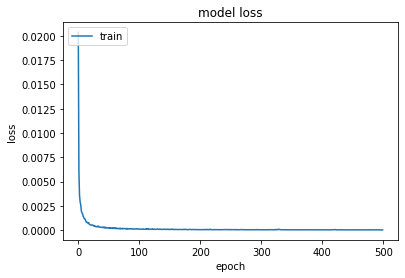

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

<class 'pandas.core.frame.DataFrame'>
(475, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
2    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
3    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
4    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
5    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
6    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
7    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
8    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
9    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
10   0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
11   0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
12   0.749999  0

<class 'pandas.core.frame.DataFrame'>
(475, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

<class 'pandas.core.frame.DataFrame'>
(477, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

hand_y max is : 1.072392115489022
hand_y min is : 0.7810518983925026
hand_z max is : 0.3348836197284272
hand_z min is : 0.04366723176483128
hand_x max is : 0.9529008801190858
hand_x min is : 0.6717803631085324
hand_y max is : 1.0723921154923597
hand_y min is : 0.7704245915707718
hand_z max is : 0.4256143977285175
hand_z min is : 0.06687830778544702
hand_x max is : 0.9543508660329038
hand_x min is : 0.7421045083853685
hand_y max is : 1.0723921155088898
hand_y min is : 0.7792901679254952
hand_z max is : 0.4099229762423224
hand_z min is : 0.05698730421795072
hand_x max is : 0.9526803792387778
hand_x min is : 0.5859430597247628
hand_y max is : 1.0723921154893272
hand_y min is : 0.7436435363136658
hand_z max is : 0.5364807407684336
hand_z min is : 0.03751754497237245
hand_x max is : 0.9532050666118402
hand_x min is : 0.7182828095117335
hand_y max is : 1.0723921154924043
hand_y min is : 0.7874838585840966
hand_z max is : 0.4491884082347085
hand_z min is : 0.046540713599843415
hand_x_max_arr 

<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.742037     0.494630       0.507960      0.031840      0.507961   
1       0.742037     0.494630       0.507960      0.031840      0.507961   
2       0.742037     0.494630       0.507960      0.031840      0.507961   
3       0.742037     0.494630       0.507960      0.031840      0.507961   
4       0.742037     0.494630       0.507960      0.031840      0.507961   
5       0.742037     0.494630       0.507960      0.031840      0.507961   
6       0.742037     0.494630       0.507960      0.031840      0.507961   
7       0.742037     0.494630       0.507960      0.031840      0.507961   
8       0.742037     0.494630       0.507960      0.031840      0.507961   
9       0.742037     0.494630       0.507960      0.031840      0.507961   
10      0.742037     0.494630       0.507960      0.031840      0.507961   
11      0.742037     0.494630       0.507960      

<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.742037     0.497058       0.502353      0.031843      0.507962   
1       0.742037     0.497058       0.502353      0.031843      0.507962   
2       0.742037     0.497058       0.502353      0.031843      0.507962   
3       0.742037     0.497058       0.502353      0.031843      0.507962   
4       0.742037     0.497058       0.502353      0.031843      0.507962   
5       0.742037     0.497058       0.502353      0.031843      0.507962   
6       0.742037     0.497058       0.502353      0.031843      0.507962   
7       0.742037     0.497058       0.502353      0.031843      0.507962   
8       0.742037     0.497058       0.502353      0.031843      0.507962   
9       0.742037     0.497058       0.502353      0.031843      0.507962   
10      0.742037     0.497058       0.502353      0.031843      0.507962   
11      0.742037     0.497058       0.502353      

Epoch 1/500
1965/1965 [==============================] - 46s 24ms/step - loss: 0.0214
Epoch 2/500
1965/1965 [==============================] - 36s 18ms/step - loss: 0.0057
Epoch 3/500
1965/1965 [==============================] - 36s 18ms/step - loss: 0.0037
Epoch 4/500
1965/1965 [==============================] - 36s 18ms/step - loss: 0.0027
Epoch 5/500
1965/1965 [==============================] - 36s 18ms/step - loss: 0.0025
Epoch 6/500
1965/1965 [==============================] - 36s 18ms/step - loss: 0.0020
Epoch 7/500
1965/1965 [==============================] - 36s 18ms/step - loss: 0.0018
Epoch 8/500
1965/1965 [==============================] - 36s 18ms/step - loss: 0.0015
Epoch 9/500
1965/1965 [==============================] - 36s 18ms/step - loss: 0.0014
Epoch 10/500
1965/1965 [==============================] - 36s 18ms/step - loss: 0.0013
Epoch 11/500
1965/1965 [==============================] - 36s 18ms/step - loss: 0.0011
Epoch 12/500
1965/1965 [============================

1965/1965 [==============================] - 36s 18ms/step - loss: 1.3574e-04
Epoch 92/500
1965/1965 [==============================] - 36s 18ms/step - loss: 1.2623e-04
Epoch 93/500
1965/1965 [==============================] - 36s 18ms/step - loss: 1.4589e-04
Epoch 94/500
1965/1965 [==============================] - 36s 18ms/step - loss: 1.5965e-04
Epoch 95/500
1965/1965 [==============================] - 36s 18ms/step - loss: 2.3555e-04
Epoch 96/500
1965/1965 [==============================] - 36s 18ms/step - loss: 1.2922e-04
Epoch 97/500
1965/1965 [==============================] - 37s 19ms/step - loss: 1.4352e-04
Epoch 98/500
1965/1965 [==============================] - 36s 18ms/step - loss: 1.3309e-04
Epoch 99/500
1965/1965 [==============================] - 36s 18ms/step - loss: 1.2249e-04
Epoch 100/500
1965/1965 [==============================] - 36s 18ms/step - loss: 1.3309e-04
Epoch 101/500
1965/1965 [==============================] - 36s 18ms/step - loss: 1.1733e-04
Epoch 102/

1965/1965 [==============================] - 35s 18ms/step - loss: 8.6859e-05
Epoch 181/500
1965/1965 [==============================] - 36s 18ms/step - loss: 6.6970e-05
Epoch 182/500
1965/1965 [==============================] - 36s 18ms/step - loss: 7.1483e-05
Epoch 183/500
1965/1965 [==============================] - 36s 18ms/step - loss: 6.5451e-05
Epoch 184/500
1965/1965 [==============================] - 36s 18ms/step - loss: 7.4752e-05
Epoch 185/500
1965/1965 [==============================] - 36s 18ms/step - loss: 6.7800e-05
Epoch 186/500
1965/1965 [==============================] - 36s 18ms/step - loss: 8.6653e-05
Epoch 187/500
1965/1965 [==============================] - 36s 18ms/step - loss: 6.0760e-05
Epoch 188/500
1965/1965 [==============================] - 36s 18ms/step - loss: 6.8809e-05
Epoch 189/500
1965/1965 [==============================] - 35s 18ms/step - loss: 6.7808e-05
Epoch 190/500
1965/1965 [==============================] - 36s 18ms/step - loss: 7.0970e-05
Ep

1965/1965 [==============================] - 36s 18ms/step - loss: 5.4405e-05
Epoch 270/500
1965/1965 [==============================] - 36s 18ms/step - loss: 5.4092e-05
Epoch 271/500
1965/1965 [==============================] - 35s 18ms/step - loss: 5.6418e-05
Epoch 272/500
1965/1965 [==============================] - 36s 18ms/step - loss: 5.0596e-05
Epoch 273/500
1965/1965 [==============================] - 36s 18ms/step - loss: 5.3847e-05
Epoch 274/500
1965/1965 [==============================] - 36s 18ms/step - loss: 5.5316e-05
Epoch 275/500
1965/1965 [==============================] - 36s 18ms/step - loss: 5.2556e-05
Epoch 276/500
1965/1965 [==============================] - 36s 18ms/step - loss: 5.2298e-05
Epoch 277/500
1965/1965 [==============================] - 36s 18ms/step - loss: 5.0798e-05
Epoch 278/500
1965/1965 [==============================] - 36s 18ms/step - loss: 5.6730e-05
Epoch 279/500
1965/1965 [==============================] - 36s 18ms/step - loss: 5.2012e-05
Ep

1965/1965 [==============================] - 36s 19ms/step - loss: 4.6385e-05
Epoch 359/500
1965/1965 [==============================] - 37s 19ms/step - loss: 4.6078e-05
Epoch 360/500
1965/1965 [==============================] - 36s 18ms/step - loss: 5.3444e-05
Epoch 361/500
1965/1965 [==============================] - 36s 18ms/step - loss: 4.2187e-05
Epoch 362/500
1965/1965 [==============================] - 37s 19ms/step - loss: 4.5658e-05
Epoch 363/500
1965/1965 [==============================] - 36s 19ms/step - loss: 4.7190e-05
Epoch 364/500
1965/1965 [==============================] - 36s 19ms/step - loss: 4.3097e-05
Epoch 365/500
1965/1965 [==============================] - 36s 18ms/step - loss: 5.4334e-05
Epoch 366/500
1965/1965 [==============================] - 37s 19ms/step - loss: 4.2727e-05
Epoch 367/500
1965/1965 [==============================] - 36s 18ms/step - loss: 4.3720e-05
Epoch 368/500
1965/1965 [==============================] - 36s 18ms/step - loss: 4.2865e-05
Ep

1965/1965 [==============================] - 36s 18ms/step - loss: 3.8640e-05
Epoch 448/500
1965/1965 [==============================] - 37s 19ms/step - loss: 4.2026e-05
Epoch 449/500
1965/1965 [==============================] - 36s 18ms/step - loss: 3.9323e-05
Epoch 450/500
1965/1965 [==============================] - 36s 18ms/step - loss: 4.7454e-05
Epoch 451/500
1965/1965 [==============================] - 37s 19ms/step - loss: 4.7401e-05
Epoch 452/500
1965/1965 [==============================] - 37s 19ms/step - loss: 3.8623e-05
Epoch 453/500
1965/1965 [==============================] - 36s 18ms/step - loss: 4.0272e-05
Epoch 454/500
1965/1965 [==============================] - 36s 19ms/step - loss: 5.0701e-05
Epoch 455/500
1965/1965 [==============================] - 36s 18ms/step - loss: 3.6675e-05
Epoch 456/500
1965/1965 [==============================] - 37s 19ms/step - loss: 4.3193e-05
Epoch 457/500
1965/1965 [==============================] - 36s 19ms/step - loss: 3.6935e-05
Ep

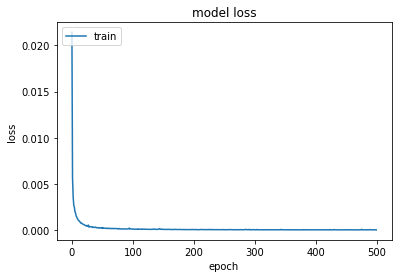

      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.747437  0.496399   0.495675  1.559631e-02  0.502802  0.497695   
2    0.744713  0.494445   0.495420  3.108582e-02  0.504518  0.499768   
3    0.736751  0.487599   0.499852  6.292728e-02  0.503982  0.501506   
4    0.728789  0.479638   0.504053  9.477040e-02  0.502533  0.506107   
5    0.720826  0.472231   0.510485  1.266141e-01  0.498753  0.510172   
6    0.712864  0.469651   0.514839  1.584595e-01  0.499176  0.510852   
7    0.704902  0.467935   0.516326  1.903042e-01  0.502580  0.512479   
8    0.696940  0.466904   0.515886  2.221487e-01  0.505730  0.510053   
9    0.688978  0.465807   0.513335  2.539928e-01  0.508656  0.506144   
10   0.681015  0.465379   0.510847  2.858373e-01  0.509966  0.503302   
11   0.673053  0.465424   0.509558  3.176820e-01  0.509489  0.501735   
12   0.665091  0.465533   0.509157  3.495267e-01  0.505728  0.49

<class 'pandas.core.frame.DataFrame'>
(495, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
1    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
2    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
3    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
4    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
5    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
6    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
7    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
8    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
9    0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
10   0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
11   0.749999  0.499999   0.500000 -7.359866e-07  0.500000  0.500008   
12   0.749999  0

<class 'pandas.core.frame.DataFrame'>
(495, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999   0.500000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

<class 'pandas.core.frame.DataFrame'>
(497, 38)
      arm_one   arm_two  arm_three      arm_four  arm_five   arm_six  \
0    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
1    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
2    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
3    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
4    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
5    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
6    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
7    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
8    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
9    0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
10   0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
11   0.749999  0.499999    0.50000 -7.360130e-07  0.500000  0.500009   
12   0.749999  0

hand_x max is : 0.9548262497780282
hand_x min is : 0.6878815783593673
hand_y max is : 1.072390007877012
hand_y min is : 0.7731470312757966
hand_z max is : 0.4178323147900985
hand_z min is : 0.05963962946003624
hand_x max is : 0.9521031040579809
hand_x min is : 0.7064161667824996
hand_y max is : 1.072392115489022
hand_y min is : 0.7810518983925026
hand_z max is : 0.3348836197284272
hand_z min is : 0.04366723176483128
hand_x max is : 0.9529008801190858
hand_x min is : 0.6717803631085324
hand_y max is : 1.0723921154923597
hand_y min is : 0.7704245915707718
hand_z max is : 0.4256143977285175
hand_z min is : 0.06687830778544702
hand_x max is : 0.9543508660329038
hand_x min is : 0.7421045083853685
hand_y max is : 1.0723921155088898
hand_y min is : 0.7792901679254952
hand_z max is : 0.4099229762423224
hand_z min is : 0.05698730421795072
hand_x max is : 0.9526803792387778
hand_x min is : 0.5859430597247628
hand_y max is : 1.0723921154893272
hand_y min is : 0.7436435363136658
hand_z max is : 0.

<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.743548     0.493127       0.494005      0.031840      0.505729   
1       0.743548     0.493127       0.494005      0.031840      0.505729   
2       0.743548     0.493127       0.494005      0.031840      0.505729   
3       0.743548     0.493127       0.494005      0.031840      0.505729   
4       0.743548     0.493127       0.494005      0.031840      0.505729   
5       0.743548     0.493127       0.494005      0.031840      0.505729   
6       0.743548     0.493127       0.494005      0.031840      0.505729   
7       0.743548     0.493127       0.494005      0.031840      0.505729   
8       0.743548     0.493127       0.494005      0.031840      0.505729   
9       0.743548     0.493127       0.494005      0.031840      0.505729   
10      0.743548     0.493127       0.494005      0.031840      0.505729   
11      0.743548     0.493127       0.494005      

<class 'pandas.core.frame.DataFrame'>
     act_arm_one  act_arm_two  act_arm_three  act_arm_four  act_arm_five  \
0       0.742037     0.497058       0.502353      0.031843      0.507962   
1       0.742037     0.497058       0.502353      0.031843      0.507962   
2       0.742037     0.497058       0.502353      0.031843      0.507962   
3       0.742037     0.497058       0.502353      0.031843      0.507962   
4       0.742037     0.497058       0.502353      0.031843      0.507962   
5       0.742037     0.497058       0.502353      0.031843      0.507962   
6       0.742037     0.497058       0.502353      0.031843      0.507962   
7       0.742037     0.497058       0.502353      0.031843      0.507962   
8       0.742037     0.497058       0.502353      0.031843      0.507962   
9       0.742037     0.497058       0.502353      0.031843      0.507962   
10      0.742037     0.497058       0.502353      0.031843      0.507962   
11      0.742037     0.497058       0.502353      

Epoch 1/500
2025/2025 [==============================] - 52s 26ms/step - loss: 0.0251
Epoch 2/500
2025/2025 [==============================] - 40s 20ms/step - loss: 0.0053
Epoch 3/500
2025/2025 [==============================] - 40s 20ms/step - loss: 0.0035
Epoch 4/500
2025/2025 [==============================] - 40s 20ms/step - loss: 0.0026
Epoch 5/500
2025/2025 [==============================] - 40s 20ms/step - loss: 0.0022
Epoch 6/500
2025/2025 [==============================] - 41s 20ms/step - loss: 0.0019
Epoch 7/500
2025/2025 [==============================] - 40s 20ms/step - loss: 0.0017
Epoch 8/500
2025/2025 [==============================] - 40s 20ms/step - loss: 0.0014
Epoch 9/500
2025/2025 [==============================] - 41s 20ms/step - loss: 0.0013
Epoch 10/500
2025/2025 [==============================] - 40s 20ms/step - loss: 0.0011
Epoch 11/500
2025/2025 [==============================] - 40s 20ms/step - loss: 9.7054e-04
Epoch 12/500
2025/2025 [========================

2025/2025 [==============================] - 40s 20ms/step - loss: 1.2827e-04
Epoch 92/500
2025/2025 [==============================] - 40s 20ms/step - loss: 1.4893e-04
Epoch 93/500
2025/2025 [==============================] - 40s 20ms/step - loss: 1.0797e-04
Epoch 94/500
2025/2025 [==============================] - 40s 20ms/step - loss: 1.4061e-04
Epoch 95/500
2025/2025 [==============================] - 41s 20ms/step - loss: 1.1624e-04
Epoch 96/500
2025/2025 [==============================] - 40s 20ms/step - loss: 1.2787e-04
Epoch 97/500
2025/2025 [==============================] - 40s 20ms/step - loss: 1.1454e-04
Epoch 98/500
2025/2025 [==============================] - 40s 20ms/step - loss: 1.2271e-04
Epoch 99/500
2025/2025 [==============================] - 40s 20ms/step - loss: 1.1508e-04
Epoch 100/500
2025/2025 [==============================] - 40s 20ms/step - loss: 1.2678e-04
Epoch 101/500
2025/2025 [==============================] - 41s 20ms/step - loss: 1.0836e-04
Epoch 102/

2025/2025 [==============================] - 40s 20ms/step - loss: 6.8358e-05
Epoch 181/500
2025/2025 [==============================] - 41s 20ms/step - loss: 6.6130e-05
Epoch 182/500
2025/2025 [==============================] - 40s 20ms/step - loss: 7.2840e-05
Epoch 183/500
2025/2025 [==============================] - 40s 20ms/step - loss: 6.9975e-05
Epoch 184/500
2025/2025 [==============================] - 40s 20ms/step - loss: 7.0831e-05
Epoch 185/500
2025/2025 [==============================] - 40s 20ms/step - loss: 7.5546e-05
Epoch 186/500
2025/2025 [==============================] - 40s 20ms/step - loss: 6.7998e-05
Epoch 187/500
2025/2025 [==============================] - 41s 20ms/step - loss: 6.7727e-05
Epoch 188/500
2025/2025 [==============================] - 40s 20ms/step - loss: 7.4351e-05
Epoch 189/500
2025/2025 [==============================] - 40s 20ms/step - loss: 7.6415e-05
Epoch 190/500
2025/2025 [==============================] - 41s 20ms/step - loss: 6.5401e-05
Ep

2025/2025 [==============================] - 39s 19ms/step - loss: 7.5708e-05
Epoch 270/500
2025/2025 [==============================] - 40s 20ms/step - loss: 5.5811e-05
Epoch 271/500
2025/2025 [==============================] - 40s 20ms/step - loss: 5.6022e-05
Epoch 272/500
2025/2025 [==============================] - 40s 20ms/step - loss: 5.6954e-05
Epoch 273/500
2025/2025 [==============================] - 39s 19ms/step - loss: 5.5597e-05
Epoch 274/500
2025/2025 [==============================] - 40s 20ms/step - loss: 7.5581e-05
Epoch 275/500
2025/2025 [==============================] - 39s 19ms/step - loss: 5.0022e-05
Epoch 276/500
2025/2025 [==============================] - 40s 20ms/step - loss: 5.4274e-05
Epoch 277/500
2025/2025 [==============================] - 40s 20ms/step - loss: 5.5978e-05
Epoch 278/500
2025/2025 [==============================] - 40s 20ms/step - loss: 5.4440e-05
Epoch 279/500
2025/2025 [==============================] - 39s 19ms/step - loss: 7.1318e-05
Ep

2025/2025 [==============================] - 40s 20ms/step - loss: 5.0639e-05
Epoch 359/500
2025/2025 [==============================] - 40s 20ms/step - loss: 5.0637e-05
Epoch 360/500
2025/2025 [==============================] - 39s 19ms/step - loss: 4.9063e-05
Epoch 361/500
2025/2025 [==============================] - 40s 20ms/step - loss: 4.5652e-05
Epoch 362/500
2025/2025 [==============================] - 40s 20ms/step - loss: 8.6280e-05
Epoch 363/500
2025/2025 [==============================] - 40s 20ms/step - loss: 4.3014e-05
Epoch 364/500
2025/2025 [==============================] - 39s 19ms/step - loss: 5.0313e-05
Epoch 365/500
2025/2025 [==============================] - 40s 20ms/step - loss: 5.3781e-05
Epoch 366/500
2025/2025 [==============================] - 40s 20ms/step - loss: 4.6846e-05
Epoch 367/500
2025/2025 [==============================] - 40s 20ms/step - loss: 4.8808e-05
Epoch 368/500
2025/2025 [==============================] - 40s 20ms/step - loss: 7.9342e-05
Ep

2025/2025 [==============================] - 40s 20ms/step - loss: 4.1180e-05
Epoch 448/500
2025/2025 [==============================] - 40s 20ms/step - loss: 5.0439e-05
Epoch 449/500
2025/2025 [==============================] - 40s 20ms/step - loss: 4.0049e-05
Epoch 450/500
2025/2025 [==============================] - 40s 20ms/step - loss: 4.6916e-05
Epoch 451/500
2025/2025 [==============================] - 40s 20ms/step - loss: 4.1617e-05
Epoch 452/500
2025/2025 [==============================] - 39s 19ms/step - loss: 3.9060e-05
Epoch 453/500
2025/2025 [==============================] - 40s 20ms/step - loss: 4.1862e-05
Epoch 454/500
2025/2025 [==============================] - 40s 20ms/step - loss: 4.1366e-05
Epoch 455/500
2025/2025 [==============================] - 40s 20ms/step - loss: 4.0940e-05
Epoch 456/500
2025/2025 [==============================] - 40s 20ms/step - loss: 3.9490e-05
Epoch 457/500
2025/2025 [==============================] - 40s 20ms/step - loss: 4.3645e-05
Ep

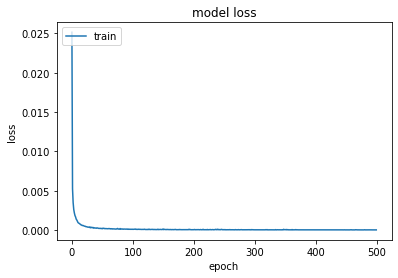

training done


In [5]:
###################single training many dataset####################################

if __name__ == '__main__':
    
    
    experiment_index = 0
    
    while(experiment_index < 16):
        if(experiment_index == 0):
            timesteps = 5
        elif(experiment_index == 1):
            timesteps = 10
        elif(experiment_index == 2):
            timesteps = 20
        elif(experiment_index == 3):
            timesteps = 30
        elif(experiment_index == 4):
            timesteps = 40
        elif(experiment_index == 5):
            timesteps = 50
        elif(experiment_index == 6):
            timesteps = 60
        elif(experiment_index == 7):
            timesteps = 70
        elif(experiment_index == 8):
            timesteps = 80
        elif(experiment_index == 9):
            timesteps = 90
        elif(experiment_index == 10):
            timesteps = 100
        elif(experiment_index == 11):
            timesteps = 110
        elif(experiment_index == 12):
            timesteps = 120
        elif(experiment_index == 13):
            timesteps = 130
        elif(experiment_index == 14):
            timesteps = 140
        elif(experiment_index == 15):
            timesteps = 150
            
        experiment_index = experiment_index + 1
        
        
        filename_0 = "datasets_full_trag/merge/0_dataset.csv"
        filename_1 = "datasets_full_trag/merge/1_dataset.csv"
#         filename_2 = "datasets_full_trag/merge/2_dataset.csv"
        filename_3 = "datasets_full_trag/merge/3_dataset.csv"
        filename_4 = "datasets_full_trag/merge/4_dataset.csv"
#         filename_5 = "datasets_full_trag/merge/5_dataset.csv"
        filename_6 = "datasets_full_trag/merge/6_dataset.csv"
        filename_7 = "datasets_full_trag/merge/7_dataset.csv"
#         filename_8 = "datasets_full_trag/merge/8_dataset.csv"
        
        train0 = readTrain(filename_0)
        train1 = readTrain(filename_1)
#         train2 = readTrain(filename_2)
        train3 = readTrain(filename_3)
        train4 = readTrain(filename_4)
#         train5 = readTrain(filename_5)
        train6 = readTrain(filename_6)
        train7 = readTrain(filename_7)
#         train8 = readTrain(filename_8)
        

        #augment data
        aug_train0 = augDataRow(train0, timesteps)
        aug_train1 = augDataRow(train1, timesteps)
#         aug_train2 = augDataRow(train2, timesteps)
        aug_train3 = augDataRow(train3, timesteps)
        aug_train4 = augDataRow(train4, timesteps)
#         aug_train5 = augDataRow(train5, timesteps)
        aug_train6 = augDataRow(train6, timesteps)
        aug_train7 = augDataRow(train7, timesteps)
#         aug_train8 = augDataRow(train8, timesteps)
        print("~~~~~~~~~~~~~~~~~~augmented finish~~~~~~~~~~~~~~~~~~~~~~~")

        hand_pos(aug_train0)
        hand_pos(aug_train1)
#         hand_pos(aug_train2)
        hand_pos(aug_train3)
        hand_pos(aug_train4)
#         hand_pos(aug_train5)
        hand_pos(aug_train6)
        hand_pos(aug_train7)
#         hand_pos(aug_train8)
    
    #     Normalization
        train_0_norm = many_normalize(aug_train0)
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        train_1_norm = many_normalize(aug_train1)
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
#         train_2_norm = many_normalize(aug_train2)
        train_3_norm = many_normalize(aug_train3)
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        train_4_norm = many_normalize(aug_train4)
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
#         train_5_norm = many_normalize(aug_train5)
        train_6_norm = many_normalize(aug_train6)
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        train_7_norm = many_normalize(aug_train7)
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
#         train_8_norm = many_normalize(aug_train8)
        
        print("~~~~~~~~~~~~~~~~~~normalize finish~~~~~~~~~~~~~~~~~~~~~~~")

    
        X0_train, Y0_train = buildTrain_v2(train_0_norm, timesteps)
        X1_train, Y1_train = buildTrain_v2(train_1_norm, timesteps)
#         X2_train, Y2_train = buildTrain_v2(train_2_norm, timesteps)
        X3_train, Y3_train = buildTrain_v2(train_3_norm, timesteps)
        X4_train, Y4_train = buildTrain_v2(train_4_norm, timesteps)
#         X5_train, Y5_train = buildTrain_v2(train_5_norm, timesteps)
        X6_train, Y6_train = buildTrain_v2(train_6_norm, timesteps)
        X7_train, Y7_train = buildTrain_v2(train_7_norm, timesteps)
#         X8_train, Y8_train = buildTrain_v2(train_8_norm, timesteps)
        
        
            
#         print(type(X0_train))
#         print(X0_train.shape)
#         print(type(Y0_train))
#         print(Y0_train.shape)
#         print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
#         print(type(X1_train))
#         print(X1_train.shape)
#         print(type(Y1_train))
#         print(Y1_train.shape)
#         print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
#         print(type(X2_train))
#         print(X2_train.shape)
#         print(type(Y2_train))
#         print(Y2_train.shape)
    
        X_train = np.concatenate((X0_train, X1_train), axis = 0)
#         X_train = np.concatenate((X_train, X2_train), axis = 0)
        X_train = np.concatenate((X_train, X3_train), axis = 0)
        X_train = np.concatenate((X_train, X4_train), axis = 0)
#         X_train = np.concatenate((X_train, X5_train), axis = 0)
        X_train = np.concatenate((X_train, X6_train), axis = 0)
        X_train = np.concatenate((X_train, X7_train), axis = 0)
#         X_train = np.concatenate((X_train, X8_train), axis = 0)


        Y_train = np.concatenate((Y0_train, Y1_train), axis = 0)
#         Y_train = np.concatenate((Y_train, Y2_train), axis = 0)
        Y_train = np.concatenate((Y_train, Y3_train), axis = 0)
        Y_train = np.concatenate((Y_train, Y4_train), axis = 0)
#         Y_train = np.concatenate((Y_train, Y5_train), axis = 0)
        Y_train = np.concatenate((Y_train, Y6_train), axis = 0)
        Y_train = np.concatenate((Y_train, Y7_train), axis = 0)
#         Y_train = np.concatenate((Y_train, Y8_train), axis = 0)



        print(X_train.shape)
        print(Y_train.shape)
       
        #model = buildManyToOneModel_expand_depth_rcdropout_doctor(X_train)

        model = buildManyToOneModel_expand_depth_nrcdropout_V2(X_train)
    
#         callback = EarlyStopping(monitor="loss", patience=15, verbose=1, mode="auto")
#         history = model.fit(X_train, Y_train, epochs=500, batch_size=128, callbacks=[callback])
        history = model.fit(X_train, Y_train, epochs=500, batch_size=64)

    
        plt.plot(history.history['loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train'], loc='upper left')
        
        trag_pos = "013467"
        
        save_lossPic_path = "model_expand_depth/full_trag/many_position/non_dropout_test/128_64_32_ver2/batch_size_64/Loss/" + trag_pos + "_LstmFullTrag_" + str(timesteps) + ".png"  
        plt.savefig(save_lossPic_path)
        plt.show()

        save_path = "model_expand_depth/full_trag/many_position/non_dropout_test/128_64_32_ver2/batch_size_64/" + trag_pos + "_LstmFullTrag_" + str(timesteps) + ".h5"  
        model.save(save_path)  # creates a HDF5 file

    
        del model
    
    print("training done")
    
    
